# 数据可视化之Plotnine
在前面的学习中，我们已经学习了如何使用统计知识解决相应的问题，包括：假设检验、方差分析、回归分析与分类分析等等。同时，我们也简单学习matplotlib的用法，并使用matplotlib做一些简单的描述性统计分析。现在，我们来到了统计分析的最后一个流程———表达分析结果。如何表达分析的结论是我们本节课程的核心关键，本节课程的主要内容包括：
- 什么是数据可视化
- python三大数据可视化工具库的简介：Matplotlib、Seaborn和Plotnine
- Matplotlib绘图基础
- Plotnine绘图基础
- 基本图表的Quick Start
- 数据可视化案例：使用Plotnine绘制元素周期表

## 1.什么是数据可视化

使用文字表达结论往往显得过于单调与枯燥，所谓“一图抵千言”，适当使用图表会增加分析结论的有趣性与可读性，这里有一个关键词叫：数据可视化。

首先，我们先来探讨下“可视化”与“数据可视化”的联系与区别。可视化和数据可视化其实都旨在使用图表去表达观点，而数据可视化更加强调使用可视化的图表去表达数据中的信息，如数据分析中的结论。可视化与数据可视化的差别其实类似于：时尚杂志封面与学术杂志封面的区别，一个注重视觉的观感，另一个在注重观感的同时表达数据结论；

其次，数据可视化在一般情况下可以分为：在分析过程中的数据可视化与分析结果表达中的数据可视化。分析过程中的数据可视化强调辅助分析，即图表不是很在意观感如何，只要自己能看懂，自己从图表中得到有用的结论并辅助分析的流程其实就可以了。而分析结果表达中的数据可视化强调在阅读数据分析结论的人能更好地知道分析结论是什么，因此相对于分析过程中的数据可视化来说更加美观、表达的信息更全面；（在这里，我们主要探讨分析结果表达中的数据可视化）

最后，什么才能称得上是一个好的数据可视化图表呢？
   - 图表展示的信息全面且无歧义
   - 图表表达的信息越多、越全面越好
   - 通俗易懂，不能太专业

下面，我们用一个例子来看看什么才算是一个好的数据可视化图表：（plotnine的官方例子）

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['font.sans-serif']=['SimHei','Songti SC','STFangsong']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import seaborn as sns 

In [2]:
df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])
df['category'] = pd.Categorical(df['category'], categories=df['category'])

df

,variable,category,value
0,gender,Female,60
1,gender,Male,40
2,age,1-24,50
3,age,25-54,30
4,age,55+,20
5,income,Lo,10
6,income,Lo-Med,25
7,income,Med,25
8,income,High,40


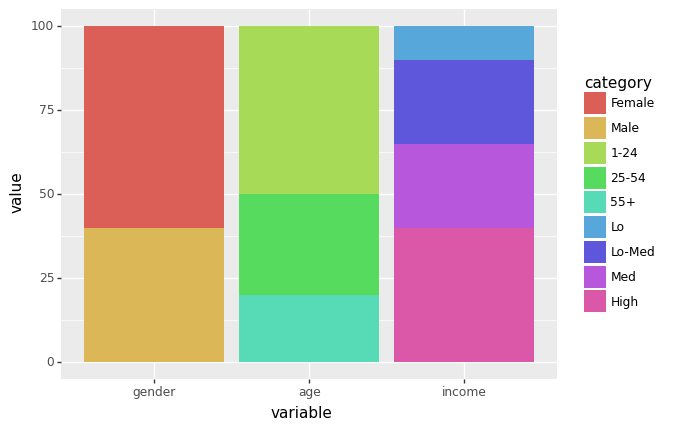

<ggplot: (147024802576)>

In [3]:
# 堆叠柱状图
from plotnine import *
(
    ggplot(df, aes(x='variable', y='value', fill='category'))+
    geom_col()
)

<div class="alert alert-warning" role="alert">
  注：需要安装plotnine，命令：pip install 

</div>

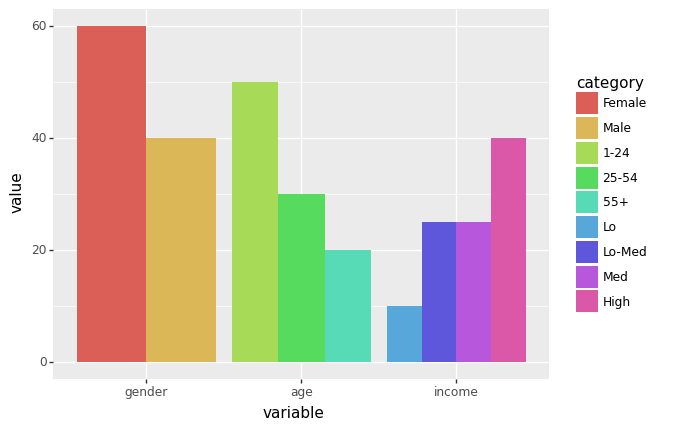

<ggplot: (147025595004)>

In [4]:
# 柱状图
from plotnine import *
(
    ggplot(df, aes(x='variable', y='value', fill='category'))+
    geom_col(stat='identity', position='dodge')
)

大家现在可以先忽略可视化的代码部分，着重观察两个图表在表达信息上的差异。以上两个图其实都是表示：在gender、age和income上，不同类别的占比，但是第一个图明显比第二个图表达的信息更多，因为第一个图能表达每个类别的大致占比情况，而第二个图只能比较不同类别下的数量情况。

## 2.Python三大数据可视化工具库的简介：Matplotlib、Seaborn和Plotnine

（1）Matplotlib：

Matplotlib正如其名，脱胎于著名的建模软件Matlab，因此它的设计与Matlab非常相似，提供了一整套和Matlab相似的命令API，适合交互式制图，还可以将它作为绘图控件，嵌入其它应用程序中。同时，Matplotlib是Python数据可视化工具库的开山鼻祖。

Matplotlib是一个面向对象的绘图工具库，pyplot是Matplotlib最常用的一个绘图接口，调用方法如下：

```{python}
import matplotlib.pyplot as plt
```

在Matplotlib中，我们可以想像自己手里拿着一支画笔🖌️，每一句代码都是往纸上添加一个绘图特征，下面我们以最简单的方式绘制散点图为例：
- 创建一个图形对象，并设置图形对象的大小（可以想象成在白纸中添加一个图，并设置图的大小）：plt.figure(figsize=(6,4))
- 在纸上的坐标系中绘制散点：plt.scatter(x=x, y=y)
- 设置x轴的标签label：plt.xlabel('x')
- 设置y轴标签的label：plt.ylabel('y')
- 设置图表的标题：plt.title('y = sin(x)')
- 展示图标：plt.show()


In [5]:
# 创建数据
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)

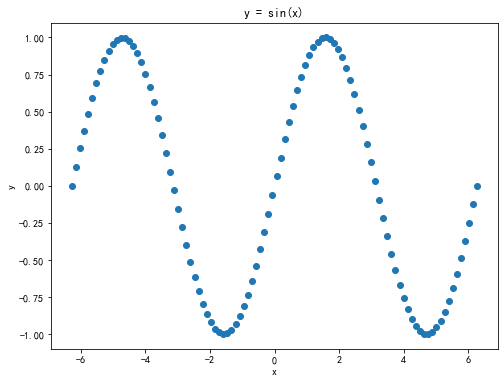

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.scatter(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x)')
plt.show()


在上面的例子中，我们听过Matplotlib绘制了最简单的散点图，但是以上的方法没有体现Matplotlib的“面向对象”的特性。下面，我们使用一个例子体会Matplotlib的面向对象绘图的特性：

【例子】绘制y = sin(x) 和 y=cos(x)的散点图：
- 创建第一个绘图对象
     - 在纸上的坐标系中绘制散点：plt.scatter(x=x, y=sin(x))
     - 设置x轴的标签label：plt.xlabel('x')
     - 设置y轴标签的label：plt.ylabel('y')
     - 设置图表的标题：plt.title('y = sin(x)')
- 创建第二个绘图对象：
     - 在纸上的坐标系中绘制散点：plt.scatter(x=x, y=cos(x))
     - 设置x轴的标签label：plt.xlabel('x')
     - 设置y轴标签的label：plt.ylabel('y')
     - 设置图表的标题：plt.title('y = cos(x)')

In [7]:
# 准备数据
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

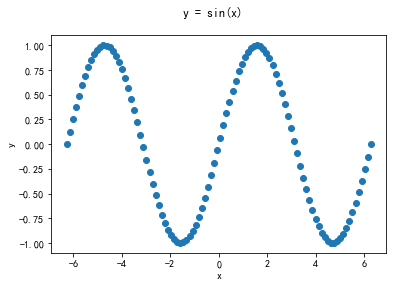

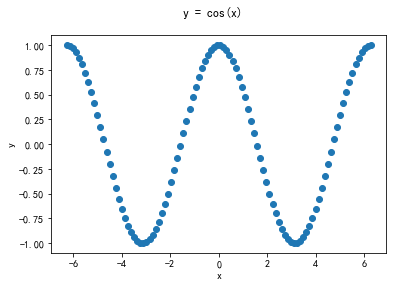

In [8]:
# 绘制第一个图：
fig1 = plt.figure(figsize=(6,4), num='first')
fig1.suptitle('y = sin(x)')
plt.scatter(x=x, y=y1)
plt.xlabel('x')
plt.ylabel('y')

# 绘制第二个图：
fig2 = plt.figure(figsize=(6,4), num='second')
fig2.suptitle('y = cos(x)')
plt.scatter(x=x, y=y2)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

现在，大家应该能体会到“Matplotlib的每一句代码都是往纸上添加一个绘图特征”这句话的含义了吧。现在，我们来看看这样的Matplotlib有什么优点与缺点。优点是非常简单易懂，而且能绘制复杂图表；缺点也是十分明显的，如果绘制复杂图表的时候一步一步地绘制，代码量还是十分巨大的。Seaborn是在Matplotlib的基础上的再次封装，是对Matplotlib绘制统计图表的简化。下面，我们一起看看Seaborn的基本绘图逻辑。

（2）Seaborn：

Seaborn主要用于统计分析绘图的，它是基于Matplotlib进行了更高级的API封装。Seaborn比matplotlib更加易用，尤其在统计图表的绘制上，因为它避免了matplotlib中多种参数的设置。Seaborn与matplotlib关系，可以把Seaborn视为matplotlib的补充。

下面，我们使用一个简单的例子，来看看使用Seaborn绘图与使用Matplotlib绘图之间的代码有什么不一样：

In [9]:
# 准备数据
x = np.linspace(-10, 10, 100)
y = 2 * x + 1 + np.random.randn(100)
df = pd.DataFrame({'x':x, 'y':y})

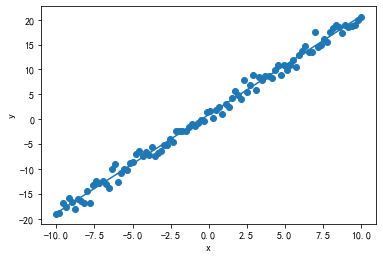

In [10]:
# 使用matplotlib绘制带有拟合直线效果的散点图
func = np.polyfit(x,y,1)  # 拟合直线
poly = np.poly1d(func)  # 设置拟合函数
y_pred = poly(x) # 预测
plt.scatter(x, y)  # 绘制点图
plt.plot(x, y_pred)  # 绘制拟合直线图
plt.xlabel('x')
plt.ylabel('y')
plt.show()

D:\conda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


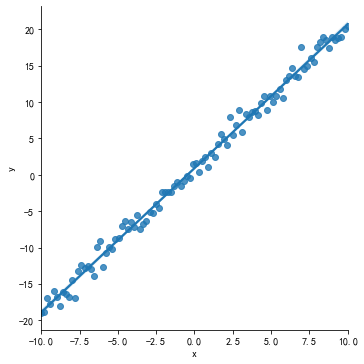

In [11]:
# 使用Seaborn绘制带有拟合直线效果的散点图
sns.lmplot("x","y",data=df) 

可以看到，Seaborn把数据拟合等**统计属性**高度集成在绘图函数中，绘图的功能还是构筑在Matplotlib之上。因此，Seaborn相当于是完善了统计图表的Matplotlib工具库，二者应该是相辅相成的。因此，在实际的可视化中，我们往往一起使用Matplotlib和Seaborn，两者的结合应该属于Python的数据可视化的一大流派吧。

（3）Plotnine：

ggplot2奠定了R语言数据可视化在R语言数据科学的统治地位，R语言的数据可视化是大一统的，提到R语言数据可视化首先想到的就是ggplot2。数据可视化一直是Python的短板，即使有Matplotlib、Seaborn等数据可视化包，也无法与R语言的ggplot2相媲美，原因在于当绘制复杂图表时，Matplotlib和Seaborn由于“每一句代码都是往纸上添加一个绘图特征”的特性而需要大量代码语句。Plotnine可以说是ggplot2在Python上的移植版，使用的基本语法与R语言ggplot2语法“一模一样”，使得Python的数据可视化能力大幅度提升，为什么ggplot2和Plotnine会更适合数据可视化呢？原因可以类似于PhotoShop绘图和PPT绘图的区别，与PPT一笔一画的绘图方式不同的是，PhotoShop绘图采用了“图层”的概念，每一句代码都是相当于往图像中添加一个图层，一个图层就是一类绘图动作，这无疑给数据可视化工作大大减负，同时更符合绘图者的认知。

下面，我们通过一个案例来看看Plotnine的图层概念以及Plotnine的基本绘图逻辑：

In [12]:
from plotnine import *     # 讲Plotnine所有模块引入
from plotnine.data import *   # 引入PLotnine自带数据集

In [13]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


mpg数据集记录了美国1999年和2008年部分汽车的制造厂商，型号，类别，驱动程序和耗油量。
- manufacturer 生产厂家
- model 型号类型
- year 生产年份
- cty 和 hwy分别记录城市和高速公路驾驶耗油量
- cyl 气缸数
- displ 表示发动机排量
- drv 表示驱动系统：前轮驱动、(f),后轮驱动®和四轮驱动(4)
- class 表示车辆类型，如双座汽车，suv，小型汽车
- fl (fuel type)，燃料类型

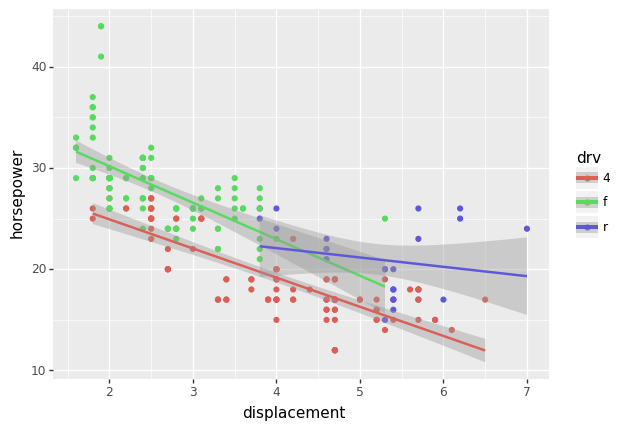

In [14]:
# 绘制汽车在不同驱动系统下，发动机排量与耗油量的关系
p1 = (
    ggplot(mpg, aes(x='displ', y='hwy', color='drv'))     # 设置数据映射图层，数据集使用mpg，x数据使用mpg['displ']，y数据使用mpg['hwy']，颜色映射使用mog['drv']
    + geom_point()       # 绘制散点图图层
    + geom_smooth(method='lm')        # 绘制平滑线图层
    + labs(x='displacement', y='horsepower')     # 绘制x、y标签图层
)
print(p1)   # 展示p1图像

从上面的案例，我们可以看到Plotnine的绘图逻辑是：一句话一个图层。因此，在Plotnine中少量的代码就能画图非常漂亮的图表，而且可以画出很多很复杂的图表，就类似于PhotoShp能轻松画出十分复杂的图但是PPT需要大量时间也不一定能达到同样的效果。

那什么时候选择Matplotlib、Seaborn还是Plotnine？

Plotnine具有ggplot2的图层特性，但是由于开发时间较晚，目前这个工具包还有一些缺陷，其中最大的缺陷就是：没有实现除了直角坐标以外的坐标体系，如：极坐标。因此，Plotnine无法绘制类似于饼图、环图等图表。为了解决这个问题，在绘制直角坐标系的图表时，我们可以使用Plotnine进行绘制，当涉及极坐标图表时，我们使用Matplotlib和Seaborn进行绘制。有趣的是，Matplotlib具有ggplot风格，可以通过设置ggplot风格绘制具有ggplot风格的图表。
```{python}
plt.style.use("ggplot")   #风格使用ggplot
```

但是值得注意的是，这里所说的绘制ggplot风格，是看起来像ggplot表格，但是实际上Matplotlib还是不具备图层风格。一旦设置ggplot风格，在接下来的所有运行的notebook代码绘图的风格都是ggplot，除非我们重启环境，才会回复默认风格。

我们使用一个案例说明这一点：


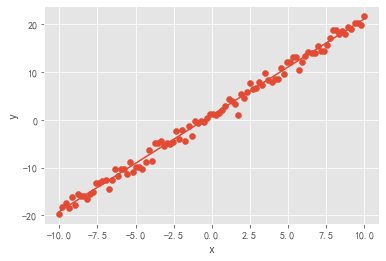

In [15]:
# 准备数据
x = np.linspace(-10, 10, 100)
y = 2 * x + 1 + np.random.randn(100)
df = pd.DataFrame({'x':x, 'y':y})

# 使用matplotlib绘制带有拟合直线效果的散点图
plt.style.use("ggplot")   #风格使用ggplot
func = np.polyfit(x,y,1)  # 拟合直线
poly = np.poly1d(func)  # 设置拟合函数
y_pred = poly(x) # 预测
plt.scatter(x, y)  # 绘制点图
plt.plot(x, y_pred)  # 绘制拟合直线图
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3.Matplotlib绘图基础

我们知道Matplotlib的绘图特性是：一句代码相当于图上的一个笔画。因此，如果知道Matplotlib的图上包含什么元素至关重要。

Matplotlib 图表的组成元素包括: 图形 (figure)、坐标图形 (axes)、图名 (title)、图例 (legend)、 主要刻度 (major tick)、次要刻度 (minor tick)、主要刻度标签(major tick label)、次要刻度标签 (minor tick label)、 Y轴名 (Y axis label)、X轴名 ( X axis label)、边框图 (line)、数据标记 (markers)、网格 (grid) 线等。具体如图所示。

<div>
<img src="./images/1.png" width="600"/>
</div>

看着上面的图表，图表元素非常多，记也记不住，不用担心，我们对以上的绘图元素进行分类。一般来说，Mayplotlib绘图元素包括：基本绘图类型与容器绘图类型。下面，我们逐一看看：

（1）基本绘图类型（graphic primitives）：点 (marker)、线 (line)、文本 (text)、图例 (legend)、网格线 (grid)、 标题 (title)、图片 (image) 等；

（2）容器绘图类型（containers）：
- Figure：最重要的元素，代表整个图像，所有的其他元素都是绘制在其上（如果有多个子图，子图也绘制在figure上）。Figure 对象包含一些特殊的 artist 对象，如图名 (title)、图例 (legend)。
- Axes：第二重要的元素，代表 subplot（子图），数据都是显示在这个区域。一个Figure至少含有一个Axes对象，当绘制多个子图时
- Axis：代表坐标轴对象，本质是一种带装饰的 spines，一般分为 xaxis 和 yaxis，Axis对象主要用于控制数据轴上的刻度位置和显示数值。
- Spines：表示数据显示区域的边界，可以显示或不显示。
- Artist：表示任何显示在 Figure 上的元素，Artist 是很通用的概念，几乎任何需要绘制的元素都可以当成是 Artist，但是一个 Artist 只能存在于一个 Axes 之上。

如图所示：
<div>
<img src="./images/2.png" width="600"/>
</div>

一般来说，要使用Matplotlib画出一副图表，需要设置一个容器绘图类型，再在容器内添加基本绘图对象，如数据元素：点 (marker)、线 (line)、文本 (text)、图例 (legend)、网格线 (grid)、 标题 (title)、图片 (image) 等。除了数据元素以外，还需要设置**图表元素**，包括图表尺寸、坐标轴的轴名及其标签、刻度、图例、网格线等。以下图表显示了除数据元素以外的图表元素的函数：

| 函数                   | 函数功能                  | 核心参数设置举例                                                                                                                                                                                                                                    |
| :------------------- | :-------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| figure()             | 设置图表的大小figsize与分辨率dpi | plt.figure(figsize=(6,3), dpi=75)                                                                                                                                                                                                           |
| title()              | 设置图表标题                | plt.title("这是一个标题")                                                                                                                                                                                                                         |
| xlabel()/ylabel()    | 设置x轴和y轴标签             | plt.xlabel("这是x轴标签")/plt.ylabel("这是y轴标签")                                                                                                                                                                                                   |
| axis()/xlim()/ylim() | 设置x轴和y轴的显示范围          | plt.axis(xmin=0, xmax=1, ymin=0\.5)/ plt.xlim(0,1)/plt.ylim(0,1)                                                                                                                                                                            |
| xticks()/yticks()    | 设置x轴和y轴的刻度数值          | plt.xticks(labels=['A', 'B', 'C', 'D'])/plt.yticks(list(np.arange(11))                                                                                                                                                                      |
| grid()               | 设置网格线                 | plt.grid(b=True, which='both', axis='y')  <br> \# b: 是否显示网格线 True/None;  <br> \# which: 网格线显示的尺度。字符串，可选参数，取值范围为{'major', 'minor', 'both'}，默认为'both'。'major'为主刻度、'minor'为次刻度。\# axis: 选择网格线显示的轴。字符串，可选参数，取值范围为{'both', 'x', 'y'}，默认为'both'`。 |
| legend()             | 设置图表的图例               | plt.legend("这是一个图例", loc='best') <br> \# loc表示图例的位置，可选：0-'best', 1-'upper right',2-'upper left',3-'lower left',4-'lower right',5-'right',6-'center left',7-'center right', <br> \# 8-'lower center',9-'upper center',10-'center'            |

下面，我们使用几个案例说明以上的概念：
- 创建一个figure，figure的大小figsize为(12,10);
- 在figure中创建两个Axes子图；
- 在每个Axes子图中分别绘制y=sin(x)和y=cos(x)图像，并添加title、xlabel、ylabel、axis、grid、和legend

<ipython-input-16-e3c2e33eba2a>:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
<ipython-input-16-e3c2e33eba2a>:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


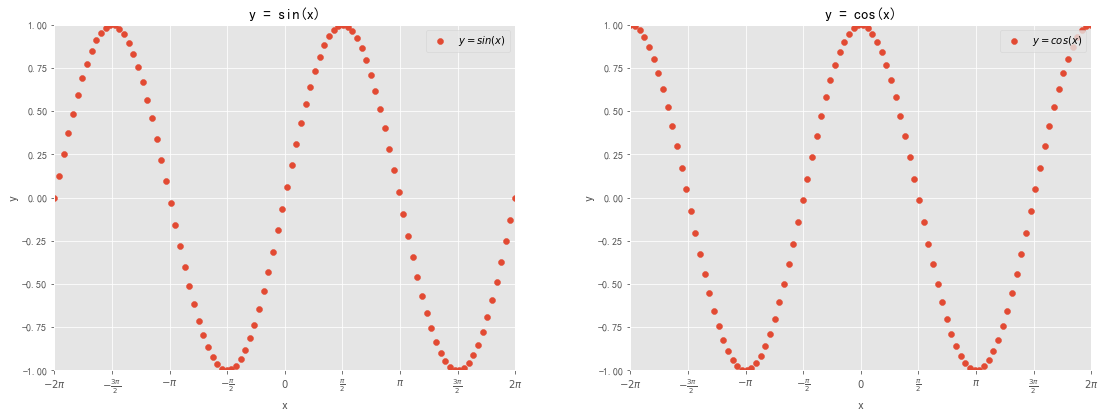

In [16]:
# 准备数据
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
# 开始绘图
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_axes([0.1,0.1,0.4,0.8])  # [left, bottom, width, height], 它表示添加到画布中的矩形区域的左下角坐标(x, y)，以及宽度和高度
plt.scatter(x=x, y=y1, label=r"$y=sin(x)$")   # 在axes1中绘制y=sin(x)散点图, label是为了legend能够知道是哪个绘图的图例
plt.title("y = sin(x)")   # 在axes1设置标题
plt.xlabel("x")    # 在axes1中设置x标签
plt.ylabel("y")    # 在axes1中设置y标签
plt.axis(xmin=-2*np.pi, xmax=2*np.pi, ymin=-1, ymax=1)  # 在axes1中设置x轴和y轴显示范围
plt.xticks(
    ticks=[-2*np.pi, -3/2*np.pi, -np.pi, -1/2*np.pi, 0, 1/2*np.pi, np.pi, 3/2*np.pi, 2*np.pi], 
    labels=[r'$-2 \pi$', r'$-\frac{3 \pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3 \pi}{2}$', r'$2\pi$']
    )   # 在axes1中设置x轴刻度的值，ticks代表在哪个位置修改，labels代表修改的具体值是多少
plt.grid(b=True, which='both')  # 在axes1中设置设置网格线
plt.legend(loc=1)   # 在axes1中设置图例

ax2 = fig.add_axes([0.6,0.1,0.4,0.8])  # [left, bottom, width, height], 它表示添加到画布中的矩形区域的左下角坐标(x, y)，以及宽度和高度
plt.scatter(x=x, y=y2, label=r"$y=cos(x)$")   # 在axes2中绘制y=cos(x)散点图，label是为了legend能够知道是哪个绘图的图例
plt.title("y = cos(x)")  # 在axes2设置标题
plt.xlabel("x")     # 在axes2中设置x轴标签
plt.ylabel("y")    # 在axes2中设置y标签
plt.axis(xmin=-2*np.pi, xmax=2*np.pi, ymin=-1, ymax=1)   # 在axes2中设置x轴和y轴显示范围
plt.xticks(
    ticks=[-2*np.pi, -3/2*np.pi, -np.pi, -1/2*np.pi, 0, 1/2*np.pi, np.pi, 3/2*np.pi, 2*np.pi], 
    labels=[r'$-2 \pi$', r'$-\frac{3 \pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3 \pi}{2}$', r'$2\pi$']
    )  # 在axes2中设置x轴刻度的值，ticks代表在哪个位置修改，labels代表修改的具体值是多少
plt.grid(b=True, which='both')   # 在axes2中设置设置网格线
plt.legend(loc=1)   # 在axes2中设置图例

plt.show()

以上的基本元素是是构成一张图所必须的，但是我们能绘制什么类型的图表至今都没有给出，直至目前为止我们也只学了散点图scatter的绘制。接下来给大家总结一下maplotlib能够绘制什么类型的图表，详细的案例会在后面给出：
<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			绘图函数
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			图表类型
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			绘图函数参数
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.plot()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			折线图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x&nbsp;
				</li>
				<li>
					y
				</li>
				<li>
					color 线条颜色
				</li>
				<li>
					linestyle线条类型
				</li>
				<li>
					linewidth 线条宽度
				</li>
				<li>
					marker 点的形状
				</li>
				<li>
					markeredgecolor 点的边框颜色
				</li>
				<li>
					markeredgewidth 点的边框的宽度
				</li>
				<li>
					markerfacecolor 点的填充颜色
				</li>
				<li>
					markersize 点的大小
				</li>
				<li>
					label 线图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.scatter()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			散点图、气泡图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					y
				</li>
				<li>
					s 散点的大小（size）
				</li>
				<li>
					c 散点的颜色（color）
				</li>
				<li>
					marker 散点的形状类型
				</li>
				<li>
					linewidths 散点的边框宽度&nbsp;
				</li>
				<li>
					edgecolors 散点的边框颜色
				</li>
				<li>
					label 点图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.bar()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			柱状图、堆叠柱状图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					height 柱子的高度
				</li>
				<li>
					width 柱子的宽度
				</li>
				<li>
					align 柱子与x的对齐方式，有：{'center'居中对齐, 'edge'左侧对齐}，默认为'center'
				</li>
				<li>
					color 柱子的填充颜色
				</li>
				<li>
					edgecolor 柱子边框的颜色
				</li>
				<li>
					linewidth 柱子边框线的宽度
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.barh()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			横向柱状图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					y
				</li>
				<li>
					height 柱子的高度
				</li>
				<li>
					width 柱子的宽度
				</li>
				<li>
					align 柱子与x的对齐方式
					<br>
				</li>
				<li>
					color 柱子的填充颜色
				</li>
				<li>
					edgecolor 柱子边框的颜色
				</li>
				<li>
					linewidth 柱子边框线的宽度
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.hist()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			直方图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					bins 划分组数
				</li>
				<li>
					range 统计的范围，默认为(x.min(), x.max())
				</li>
				<li>
					density 频数直方图还是频率直方图
				</li>
				<li>
					align&nbsp;柱子与x的对齐方式
				</li>
				<li>
					color 颜色
				</li>
				<li>
					label 直方图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.boxplot()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			箱线图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					notch 是否凹口展示
				</li>
				<li>
					sym 散点的形状
				</li>
				<li>
					vert 水平箱线图还是竖向箱线图
				</li>
				<li>
					widths 箱子的宽度
				</li>
				<li>
					label 箱线图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.fill_between()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			面积图、填充图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					y
				</li>
				<li>
					facecolor 填充颜色
				</li>
				<li>
					edgecolor 边缘线条颜色
				</li>
				<li>
					linewidth 边缘线宽度
				</li>
				<li>
					where 填充的范围
				</li>
				<li>
					interpolate&nbsp;interpolate只有在使用了where参数同时两条曲线交叉时才有效, 使用这个参数会把曲线交叉处也填充使得填充的更完整
				</li>
				<li>
					alpha 透明度
				</li>
				<li>
					label 面积图的标签（常配合legend）<wbr>
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.stackplot()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			堆叠面积图、河流图
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x&nbsp;尺寸为N的一维数组&nbsp;
				</li>
				<li>
					y&nbsp;尺寸为(M,N)的二维数组&nbsp;
				</li>
				<li>
					baseline 基线，取值范围为{'zero', 'sym', 'wiggle', 'weighted_wiggle'}：'zero'：以0为基线，比如绘制简单的堆积面积图；'sym'：以0上下对称，有时被称为主题河流图；'wiggle'：所有序列的斜率平方和最小；'weighted_wiggle'： 类似于'wiggle'，但是增加各层的大小作为权重。绘制出的图形也被称为流图（streamgraph）。
				</li>
				<li>
					堆叠面积图的标签（常配合legend）
				</li>
			</ul>
			<wbr>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.pie()&nbsp;<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			饼状图<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					<font><b>x&nbsp;</b> (每一块)的比例，如果sum(x) &gt; 1会使用sum(x)归一化</font><wbr>
				</li>
				<li>
					<font>colors 填充的颜色</font>
				</li>
				<li>
					<font>labels&nbsp;</font><font>(每一块)饼图外侧显示的说明文字</font>
				</li>
				<li>
					<font>radius&nbsp;控制饼图半径</font>
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.errorbar()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			误差折线图&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					y
				</li>
				<li>
					yerr y轴的误差范围
				</li>
				<li>
					xerr x轴的误差范围
				</li>
				<li>
					fmt fmt参数的值和plot方法中指定点的颜色，形状，线条风格的缩写方式相同，如：<font>fmt='co--'</font><wbr>
				</li>
				<li>
					<font>ecolor 误差线的颜色</font>
				</li>
				<li>
					<font>elinewidth 误差线的宽度</font>
				</li>
				<li>
					<font>ms 数据点的大小</font>
				</li>
				<li>
					<font>mfc 数据点的填充颜色</font>
				</li>
				<li>
					<font>mec 数据点边缘颜色</font>
				</li>
				<li>
					<font>capthick 误差线的粗细</font>
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.axhline()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			水平直线
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					y
				</li>
				<li>
					xmin&nbsp;取值位于[0,1]之间，取值0时在图的左边界，取值1时在图的右边界
				</li>
				<li>
					xmax&nbsp;取值位于[0,1]之间，0取值时在图的左边界，取值1时在图的右边界
				</li>
				<li>
					color 线条颜色
				</li>
				<li>
					linestyle 线条类型
				</li>
				<li>
					linewidth 线条宽度
				</li>
				<li>
					label 线图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.axvline()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			竖向直线
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x
				</li>
				<li>
					ymin&nbsp;取值位于[0,1]之间，取值0时在图的左边界，取值1时在图的右边界
				</li>
				<li>
					ymax&nbsp;取值位于[0,1]之间，0取值时在图的左边界，取值1时在图的右边界
				</li>
				<li>
					color 线条颜色
				</li>
				<li>
					linestyle 线条类型
				</li>
				<li>
					linewidth 线条宽度
				</li>
				<li>
					label 线图的标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.axhspan()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			水平矩形带
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					ymin 矩形条带下边界的y坐标
				</li>
				<li>
					ymax 矩形条带上边界的y坐标
				</li>
				<li>
					facecolor 填充颜色
				</li>
				<li>
					alpha 透明度
				</li>
				<li>
					edgecolor 边缘线条颜色
				</li>
				<li>
					linestyle 线条类型
				</li>
				<li>
					linewidth 线条宽度
				</li>
				<li>
					label 条带标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.axvspan()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			竖直矩形带
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					xmin 矩形条带左边界的x坐标
				</li>
				<li>
					xmax 矩形条带右边界的x坐标
				</li>
				<li>
					facecolor 填充颜色
				</li>
				<li>
					alpha 透明度
				</li>
				<li>
					edgecolor 边缘线条颜色
				</li>
				<li>
					linestyle 线条类型
				</li>
				<li>
					linewidth 线条宽度
				</li>
				<li>
					label 条带标签（常配合legend）
				</li>
			</ul>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.text()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			文本
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					x 文本位置的x坐标
				</li>
				<li>
					y 文本位置的y坐标
				</li>
				<li>
					s 文本
				</li>
				<li>
					fontdict 使用字典dict形式定义文本的字体属性，如：
				</li>
			</ul>
			fontdict =&nbsp;
			<br>
			dict(
			<br>
			fontsize=12,
			<br>
			color='r',
			<br>
			family='monospace',<i>#字体,可选'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'</i>
			<br>
			weight='bold',<i>#磅值，可选'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'</i>&nbsp;
			<br>
			)<wbr>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			plt.annotate()&nbsp;
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			添加带箭头的文本标注
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<ul>
				<li>
					s 标注的文本内容
				</li>
				<li>
					xy 代表标注点的坐标位置
				</li>
				<li>
					xytext 标注的文字的坐标<wbr>
				</li>
				<li>
					arrowprops 箭头参数,参数类型为字典dict，如：<wbr>
				</li>
			</ul>
			arrowprops=dict(
			<br>
			arrowstyle = '-&gt;',&nbsp; # 箭头的风格
			<br>
			connectionstyle = 'arc3,&nbsp;# 连接方式
			<br>
			rad=0.2' # 弯曲的角度
			<br>
			)<wbr>
		</td>
	</tr>
</table>

理论上，有了绘图的基本元素以及基本图表，就可以使用Matplotlib绘制绝大多数的图表，足够满足我们的需求了。现在，我们把目光放到另一种绘图体系中，即：以ggplot2体系为基础的Plotnine绘图工具包的基本使用上，对比两个绘图工具包之间有什么区别。

## 4.Plotnine绘图基础

众所周知，Plotnine是模仿R语言ggplot2工具包而诞生的Python工具库，那什么是gg呢？ggplot2中的gg代表Grammer of Graphics，这是一个关于绘图的概念，这个概念强调使用“语法Grammer”来绘图。Plotnine绘图的基本语法跟R语言的ggplot2基本一致，Plotnine绘图使用图层的概念，其中Plotnine中的图层可以分为：必备图层和可选图层。

（1）必备图层：ggplot()图层与geom_xxx()/stat_xxx()图层：
- ggplot()图层：底层绘图函数，ggplot()函数可以将绘图和数据分离，在ggplot内可以设置数据以及数据的映射，如：ggplot(data, aes(x='col_x', y='y_value', fill='col_class'))。因此，在ggplot()中，除了设置数据外，还可以设置变量的映射aes()，用来表示x和y，还可以在aes()内控制颜色color、大小size和形状shape等等。
- geom_xxx()图层：几何对象，即我们在图中实际看到的图形元素，比如：散点图geom_point()、柱状图geom_bar()、折线图geom_line()、直方图geom_histogram()等等。同样的，我们也可以仅仅通过改变几何对象来生成不同的几何图形。通常来说，通常只使用geom_xxx()就可以绘制绝大多数的统计图表，但是如果涉及复杂的统计变换，那么则需要使用stat_xxx()图层。根据图层函数输入的变量个数和输入变量的数据类型，可以将geom_xxx()图层的函数总结如下：
  
<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			变量个数
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			变量类型
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_xxx()函数
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			函数作用
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			1
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			连续型
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_histogram ()
			<br>
			geom_density()
			<br>
			geom_dotplot()
			<br>
			geom_freqpoly()
			<br>
			geom_qq()
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			直方图
			<br>
			密度图
			<br>
			点图
			<br>
			频次图
			<br>
			qq图<wbr>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			1
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			离散型
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_bar()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			柱状图
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			x连续型-y连续型
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_point()
			<br>
			geom_area()
			<br>
			geom_line()
			<br>
			geom_jitter()
			<br>
			geom_smooth()
			<br>
			geom_label()
			<br>
			geom_text()
			<br>
			geom_bin2d()
			<br>
			geom_density2d()
			<br>
			geom_step()
			<br>
			geom_quantile()
			<br>
			geom_rug()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			散点图
			<br>
			面积图
			<br>
			线图
			<br>
			抖动散点图
			<br>
			平滑图
			<br>
			带背景的文本注释图
			<br>
			文字注释
			<br>
			阶梯图
			<br>
			分位数回归图
			<br>
			突出xy位置的散点图<wbr>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			x离散-y连续
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_boxplot()
			<br>
			geom_violin()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			箱线图
			<br>
			提琴图<wbr>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			x离散-y离散
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_count()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			统计直方图
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			3
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			x连续-y连续-z连续
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			geom_tile()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			热力图
		</td>
	</tr>
</table>



- stat_xxx()图层：统计变换图层，比如求均值，求方差等，当我们需要展示出某个变量的某种统计特征的时候，则需要用到统计变换。

下面，我们使用一个例子说明如何使用Plotnine必备图层作图：


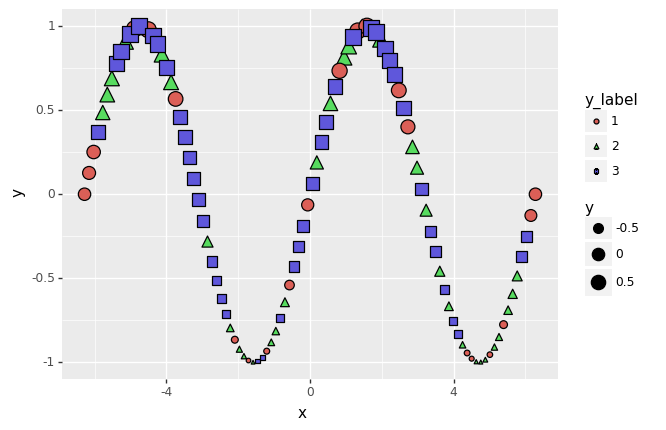

In [17]:
# 准备数据
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)
y_label = np.random.choice(['1','2','3'], 100)
data = pd.DataFrame({'x':x, 'y':y, 'label':y_label})

# 绘制散点图geom_point()
p1 = (
    ggplot(data, aes(x='x', y='y', fill='y_label', size='y', shape='y_label'))+
    geom_point()
)
print(p1)


（2）可选图层：必备图层其实已经囊括了绝大对数绘图函数，基本图形已经可以绘制。但是，光只有绘图函数还是不够的，还需要美化图表的相关图层以及变换坐标系相关图层，包括：scale_xxx()、facet_xxx()、guides_xxx()、coord_xxx()以及theme()。
- scale_xxx()图层：标度（scale）是用于调整数据映射的图形属性，scale_xxx()获取数据并对其进行调整以适应视觉的不同方面，即长度、颜色、大小和形状等。一般来说，scale_xxx()的基本格式为：scale_映射类型_数据类型（）。其中，映射类型包括：xy轴，size, color(颜色), fill(填充颜色), shape, alpha(透明度), linetype；数据类型包括：连续型continuous，离散型discrete，自定义manual，同一型identity。
<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>连续型continuous</b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>离散型discrete</b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>自定义manual</b>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<b>同一型identity</b>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			坐标轴标度scale_x_xxx()/scale_y_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_x_continous()
			<br>
			scale_y_continous()
			<br>
			scale_x_log10()
			<br>
			scale_y_log10()
			<br>
			scale_x_sqrt()
			<br>
			scale_y_sqrt()
			<br>
			scale_x_reverse()
			<br>
			scale_y_reverse()
			<br>
			scale_x_date()
			<br>
			scale_y_date()
			<br>
			scale_x_datetime()
			<br>
			scale_y_datetime()
			<br>
			scale_x_timedelta()
			<br>
			scale_y_timedelta()
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_x_discrete()
			<br>
			scale_y_discrete()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			颜色标度sclae_color_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_color_continous()
			<br>
			scale_color_distiller()
			<br>
			scale_color_gradient()
			<br>
			scale_color_gradient2()
			<br>
			scale_color_gradientn()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_color_discrete()
			<br>
			scale_color_brewer()
			<br>
			scale_color_hue()
			<br>
			<font color="#333333">scale_color_grey()<wbr></font><font color="#333333">scale_color_gray()</font><wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<font color="#333333">scale_color_manual()</font>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			<font color="#333333">scale_color_identity()</font>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			填充标度scale_fill_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_fill_continuous()
			<br>
			scale_fill_distiller()
			<br>
			scale_fill_gradient()
			<br>
			scale_fill_gradient2()
			<br>
			scale_fill_gradientn()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_fill_discrete()
			<br>
			scale_fill_brewer()
			<br>
			scale_fill_hue()
			<br>
			scale_fill_gray()
			<br>
			scale_fill_grey()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_fill_manual()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_fill_identity()
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			大小标度scale_size_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_size()
			<br>
			scale_size_area()
			<br>
			scale_size_radius()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_size_manual()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_size_identity()
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			透明度标度scale_alpha_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_alpha()
			<br>
			scale_alpha_continuous()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_alpha_discrete()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_alpha_manual()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_alpha_identity
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			线条样式标度scale_linetype_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_linetype()
			<br>
			scale_linetype_discrete()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_linetype_manual()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_linetype_identity()
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			形状标度scale_shape_xxx()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_shape()
			<br>
			scale_shape_discrete()<wbr>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_shape_manua()
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			scale_shape_identity(
		</td>
	</tr>
	<tr>
		<td colspan="5" style="padding-right: 3pt; padding-left: 3pt;">
			参数列表&nbsp; &nbsp; &nbsp; &nbsp;lims()&nbsp; &nbsp;&nbsp;xlim()&nbsp; &nbsp;&nbsp;ylim()&nbsp; &nbsp; &nbsp;&nbsp;expand_limits()&nbsp; &nbsp; &nbsp;guides()&nbsp; &nbsp; &nbsp;&nbsp;guide()&nbsp; &nbsp; &nbsp;guide_legend()&nbsp; &nbsp; &nbsp; &nbsp;guide_colorbar()
		</td>
	</tr>
</table>

举个例子：

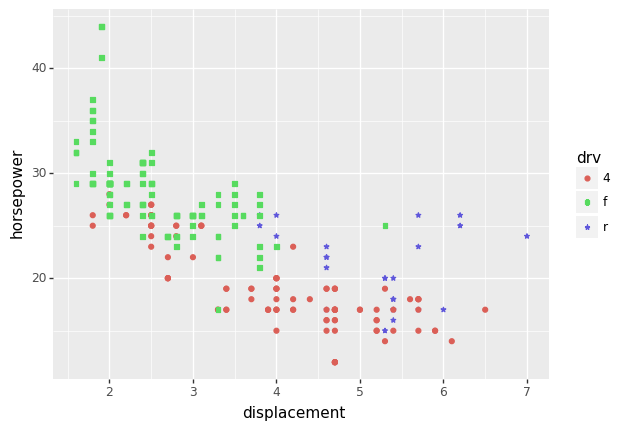

In [18]:
p1 = (
    ggplot(mpg, aes(x='displ', y='hwy', color='drv', shape='drv'))     # 设置数据映射图层，数据集使用mpg，x数据使用mpg['displ']，y数据使用mpg['hwy']，颜色映射使用mog['drv']
    + geom_point()       # 绘制散点图图层
    + labs(x='displacement', y='horsepower')     # 绘制x、y标签图层
    + scale_shape_manual(values=('o', 's', '*'))  # 添加shape映射美化
)
print(p1)   # 展示p1图像

- coord_xxx()图层：坐标系图层，一般来说，平面中的坐标系有笛卡尔直角坐标系和极坐标系，plotnine目前只支持直角坐标系，因此这是plotnine最大的弊端。在plotnine中，coord_xxx()图层的函数有：
   - coord_cartesian()
   - coord_equal()
   - coord_fixed()
   - coord_flip()
   - coord_trans()

- facet_xxx()图层：分面图层，主要是将一个图按照某个变量分解成多个图，主要是对比在同一变量的不同取值下，关系图表的变化。分面图层的函数有：
     - facet()
     - facet_grid()
     - facet_null()
     - facet_wrap()

   举个例子：

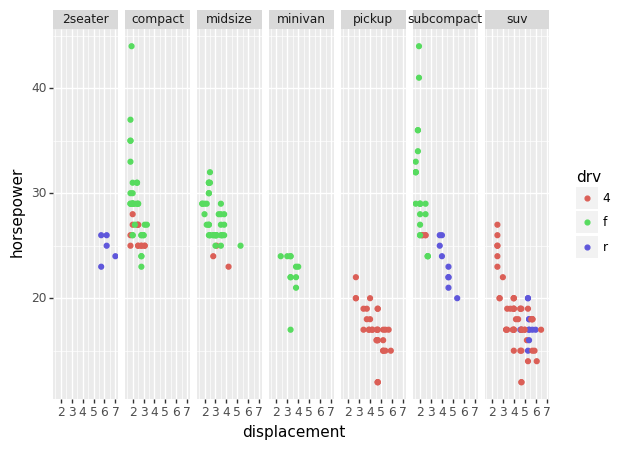

In [19]:
# 绘制汽车在不同的车辆类型下，在不同的驱动系统，发动机排量与耗油量的关系
p1 = (
    ggplot(mpg, aes(x='displ', y='hwy', color='drv'))     # 设置数据映射图层，数据集使用mpg，x数据使用mpg['displ']，y数据使用mpg['hwy']，颜色映射使用mog['drv']
    + geom_point()       # 绘制散点图图层
    + labs(x='displacement', y='horsepower')     # 绘制x、y标签图层
    + facet_grid('.~ class', labeller='label_value') # 按照车辆类型分面
)
print(p1)   # 展示p1图像

- theme():主题调整，主要是设定主题风格。主要有以下主题：
     - theme()
     - theme_538()
     - theme_bw()
     - theme_classic()
     - theme_dark()
     - theme_gray()
     - theme_grey()
     - theme_light()
     - theme_linedraw()
     - theme_matplotlib()
     - theme_minimal()
     - theme_seaborn()
     - theme_void()
     - theme_xkcd()

## 5.基本图表的Quick Start

首先，在画图之前，我们先要知道数据可视化的图像能分成几类？根据数据表现的内容，我们将数据可视化的图表分为以下类别：
- 类别型图表
- 关系型图表
- 数据分布型图表
- 时间序列型图表
- 空间分布型图表

（1）类别型图表：

类别型图表一般表现为：X类别下Y数值之间的比较，因此类别型图表往往包括：**X为类别型数据、Y为数值型数据**。类别型图表常常有：柱状图、横向柱状图（条形图）、堆叠柱状图、极坐标的柱状图、词云、雷达图、桑基图等等。

（2）关系型图表：

关系型图表一般表现为：X数值与Y数值之间的关系，如：是否是线性关系、是否有正向相关关系等等。一般来说，关系可以分为：数值型关系、层次型关系和网络型关系。
- 数值型关系：主要展示两个变量或者多个变量之间的数值关系，如：最简单的散点图、气泡图、相关系数矩阵图、等高线图、曲面图等等。
- 层次型关系：主要展示数据个体（样本）之间的层次关系，有从属关系和包含关系两种。从属关系顾名思义如：不同职位之间的上下属关系，如最简单的树状图；包含关系如：欧洲不同的足球联赛的队伍包含关系，不同洲的国家包含关系等等，如：韦恩图、弧长链接图、圆填充图、旭日图等等。
- 网络型关系：常常值个体之间有联系，但并不是相互包含或者从属关系，如：微信中的朋友的关系网络。网络型关系的图表一般有：和弦图、桑基图、网络图等等。

（3）数据分布型图表：

分布这个词在概率论和数理统计中出现，分布常常指数据以及出现的频率，常见的图表有：频次直方图、频率直方图、核密度图、箱线图、提琴图等等。

（4）时间序列型图表：

时间序列型图表主要描述了数据沿着之间变化而变化的规律，一般来说横轴是时间，纵轴是数值或者类别型数据。常见的图表有折线图、日历图、甘特图等等。

（5）空间分布型图表：

空间分布顾名思义，主要描述了某个数值型/类别型数据随着空间位置变化的规律，如：地图散点图、地图气泡图、地图热力图等等。

下面，我们来详细学习每一种图表的绘制过程：

### 5.1 类别型图表：

（1）柱状图:

柱状图一般分为单系列柱状图、多系列柱状图、堆叠柱状图和百分比柱状图：

<ipython-input-20-7c5238cb0e19>:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


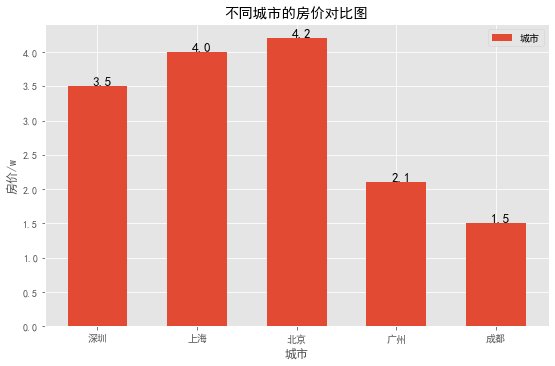

In [20]:
## Matplotlib绘制单系列柱状图：不同城市的房价对比
data = pd.DataFrame({'city':['深圳', '上海', '北京', '广州', '成都'], 'house_price(w)':[3.5, 4.0, 4.2, 2.1, 1.5]})

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0.15,0.15,0.7,0.7])  # [left, bottom, width, height], 它表示添加到画布中的矩形区域的左下角坐标(x, y)，以及宽度和高度
plt.bar(data['city'], data['house_price(w)'], width=0.6, align='center', orientation='vertical', label='城市')
"""
x 表示x坐标，数据类型为int或float类型，也可以为str
height 表示柱状图的高度，也就是y坐标值，数据类型为int或float类型
width 表示柱状图的宽度，取值在0~1之间，默认为0.8
bottom 柱状图的起始位置，也就是y轴的起始坐标
align 柱状图的中心位置，"center","lege"边缘
color 柱状图颜色
edgecolor 边框颜色
linewidth 边框宽度
tick_label 下标标签
log 柱状图y周使用科学计算方法，bool类型
orientation 柱状图是竖直还是水平，竖直："vertical"，水平条："horizontal"
"""
plt.title("不同城市的房价对比图")   # 在axes1设置标题
plt.xlabel("城市")    # 在axes1中设置x标签
plt.ylabel("房价/w")    # 在axes1中设置y标签
plt.grid(b=True, which='both')  # 在axes1中设置设置网格线
for i in range(len(data)):
    plt.text(i-0.05, data.iloc[i,]['house_price(w)']+0.01, data.iloc[i,]['house_price(w)'],fontsize=13)   # 添加数据注释
plt.legend()
plt.show()


findfont: Font family ['Songti SC'] not found. Falling back to DejaVu Sans.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py

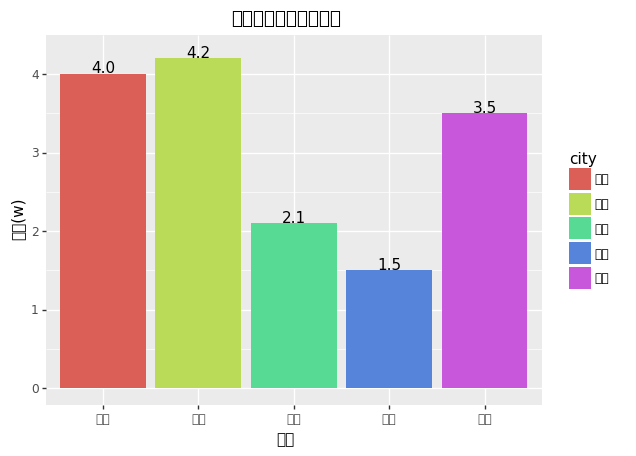

In [21]:
## Plotnine绘制单系列柱状图：不同城市的房价对比
data = pd.DataFrame({'city':['深圳', '上海', '北京', '广州', '成都'], 'house_price(w)':[3.5, 4.0, 4.2, 2.1, 1.5]})

p_single_bar = (
    ggplot(data, aes(x='city', y='house_price(w)', fill='city', label='house_price(w)'))+
    geom_bar(stat='identity')+
    labs(x="城市", y="房价(w)", title="不同城市的房价对比图")+
    geom_text(nudge_y=0.08)+
    theme(text = element_text(family = "Songti SC"))
)
print(p_single_bar)


<ipython-input-22-baa291590209>:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


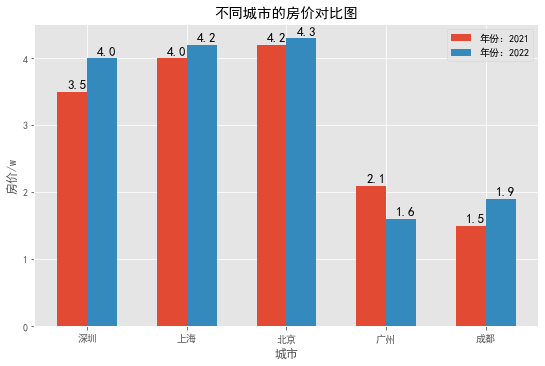

In [22]:
## Matplotlib绘制多系列柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0.15,0.15,0.7,0.7])  # [left, bottom, width, height], 它表示添加到画布中的矩形区域的左下角坐标(x, y)，以及宽度和高度
plt.bar(
    np.arange(len(np.unique(data['城市'])))-0.15, 
    data.loc[data['年份']==2021,'房价(w)'], 
    width=0.3, 
    align='center', 
    orientation='vertical', 
    label='年份：2021'
    )
plt.bar(
    np.arange(len(np.unique(data['城市'])))+0.15, 
    data.loc[data['年份']==2022,'房价(w)'], 
    width=0.3, 
    align='center', 
    orientation='vertical', 
    label='年份：2022'
    )
plt.title("不同城市的房价对比图")   # 在axes1设置标题
plt.xlabel("城市")    # 在axes1中设置x标签
plt.ylabel("房价/w")    # 在axes1中设置y标签
plt.xticks(np.arange(len(np.unique(data['城市']))), np.array(['深圳', '上海', '北京', '广州', '成都']))
plt.grid(b=True, which='both')  # 在axes1中设置设置网格线

data_2021 = data.loc[data['年份']==2021,:]
for i in range(len(data_2021)):
    plt.text(i-0.15-0.05, data_2021.iloc[i,2]+0.05, data_2021.iloc[i,2],fontsize=13)   # 添加数据注释

data_2022 = data.loc[data['年份']==2022,:]
for i in range(len(data_2022)):
    plt.text(i+0.15-0.05, data_2022.iloc[i,2]+0.05, data_2022.iloc[i,2],fontsize=13)   # 添加数据注释
plt.legend()
plt.show()

D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from

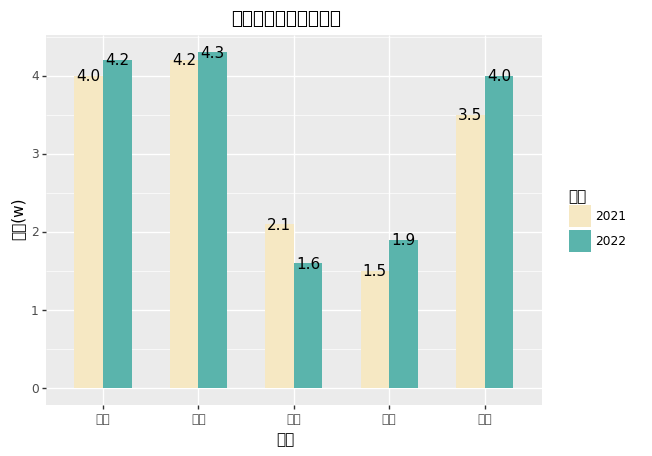

In [23]:
## Plotnine绘制多系列柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})

data['年份'] = pd.Categorical(data['年份'], ordered=True, categories=data['年份'].unique())
p_mult_bar = (
    ggplot(data, aes(x='城市', y='房价(w)', fill='年份'))+
    geom_bar(stat='identity',width=0.6, position='dodge')+
    scale_fill_manual(values = ["#f6e8c3", "#5ab4ac"])+
    labs(x="城市", y="房价(w)", title="不同城市的房价对比图")+
    geom_text(aes(label='房价(w)'), position = position_dodge2(width = 0.6, preserve = 'single'))+
    theme(text = element_text(family = "Songti SC"))
)
print(p_mult_bar)

   城市  2021房价  2022房价
0  上海     4.0     4.2
1  北京     4.2     4.3
2  广州     2.1     1.6
3  成都     1.5     1.9
4  深圳     3.5     4.0


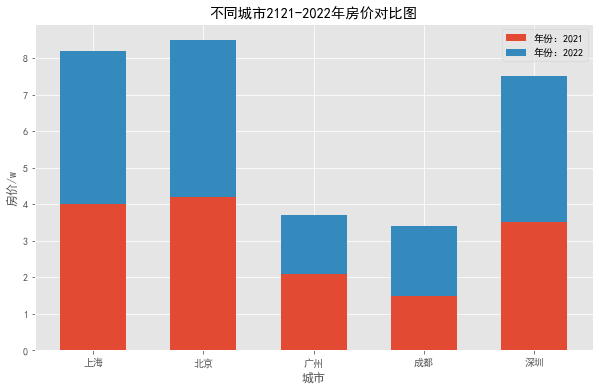

In [24]:
## Matplotlib绘制堆叠柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})
tmp=data.set_index(['城市','年份'])['房价(w)'].unstack()
data=tmp.rename_axis(columns=None).reset_index()
data.columns = ['城市','2021房价','2022房价']
print(data)

plt.figure(figsize=(10,6))
plt.bar(
    data['城市'], 
    data['2021房价'], 
    width=0.6, 
    align='center', 
    orientation='vertical', 
    label='年份：2021'
    )
plt.bar(
    data['城市'], 
    data['2022房价'], 
    width=0.6, 
    align='center', 
    orientation='vertical', 
    bottom=data['2021房价'],
    label='年份：2022'
    )
plt.title("不同城市2121-2022年房价对比图")   # 在axes1设置标题
plt.xlabel("城市")    # 在axes1中设置x标签
plt.ylabel("房价/w")    # 在axes1中设置y标签
plt.legend()
plt.show()


D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from

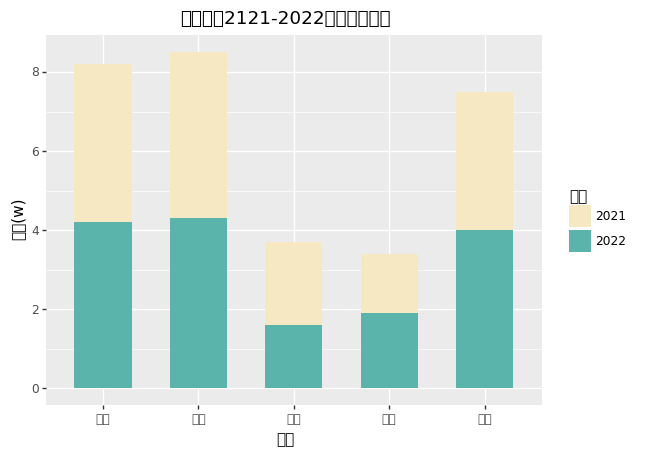

In [25]:
## Plotnine绘制堆叠柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})

data['年份'] = pd.Categorical(data['年份'], ordered=True, categories=data['年份'].unique())
p_mult_bar = (
    ggplot(data, aes(x='城市', y='房价(w)', fill='年份'))+
    geom_bar(stat='identity',width=0.6, position='stack')+   # 只需要改变position='stack'
    scale_fill_manual(values = ["#f6e8c3", "#5ab4ac"])+
    labs(x="城市", y="房价(w)", title="不同城市2121-2022年房价对比图")+
    theme(text = element_text(family = "Songti SC"))
)
print(p_mult_bar)

   城市  2021房价  2022房价
0  上海     4.0     4.2
1  北京     4.2     4.3
2  广州     2.1     1.6
3  成都     1.5     1.9
4  深圳     3.5     4.0


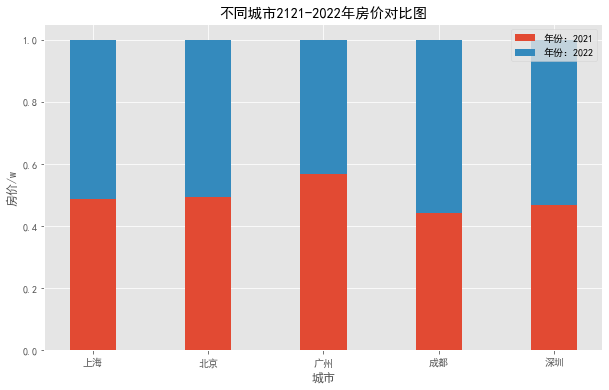

In [26]:
## Matplotlib绘制百分比柱状图：不同城市在不同年份的房价对比
## Matplotlib绘制堆叠柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})
tmp=data.set_index(['城市','年份'])['房价(w)'].unstack()
data=tmp.rename_axis(columns=None).reset_index()
data.columns = ['城市','2021房价','2022房价']
print(data)

plt.figure(figsize=(10,6))
plt.bar(
    data['城市'], 
    data['2021房价']/(data['2021房价']+data['2022房价']), 
    width=0.4, 
    align='center', 
    orientation='vertical', 
    label='年份：2021'
    )
plt.bar(
    data['城市'], 
    data['2022房价']/(data['2021房价']+data['2022房价']), 
    width=0.4, 
    align='center', 
    orientation='vertical', 
    bottom=data['2021房价']/(data['2021房价']+data['2022房价']),
    label='年份：2022'
    )
plt.title("不同城市2121-2022年房价对比图")   # 设置标题
plt.xlabel("城市")    # 在axes1中设置x标签
plt.ylabel("房价/w")    # 在axes1中设置y标签
plt.legend()
plt.show()

D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from

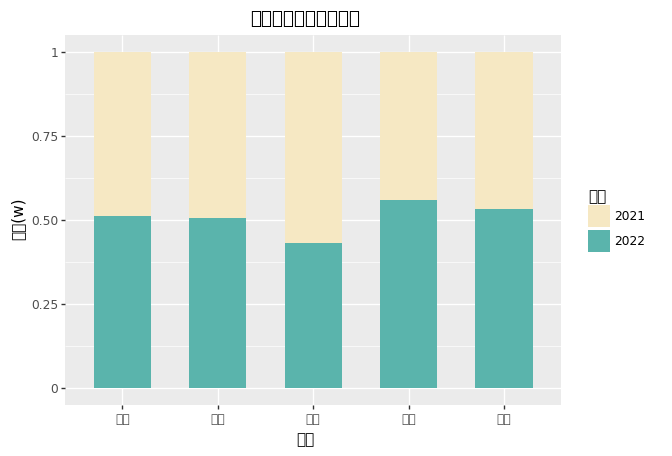

In [27]:
## Plotnine绘制百分比柱状图：不同城市在不同年份的房价对比
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})

data['年份'] = pd.Categorical(data['年份'], ordered=True, categories=data['年份'].unique())
p_mult_bar = (
    ggplot(data, aes(x='城市', y='房价(w)', fill='年份'))+   
    geom_bar(stat='identity',width=0.6, position='fill')+     # 只需要改变position='fill'
    scale_fill_manual(values = ["#f6e8c3", "#5ab4ac"])+
    labs(x="城市", y="房价(w)", title="不同城市的房价对比图")+
    theme(text = element_text(family = "Songti SC"))
)
print(p_mult_bar)

（2）火柴图：（棒棒糖图）

由于柱状图在表达数据的数值大小时使用的是不等高的长方形柱子，柱子会占据大量的绘图面积，因此当类别较多时，会出现画不下的情况。再者，柱子的宽度并没有表达什么信息，因此可以省略柱子或者将柱子替换为直线就可以节省大量的绘图空间，这样的图就是火柴图。

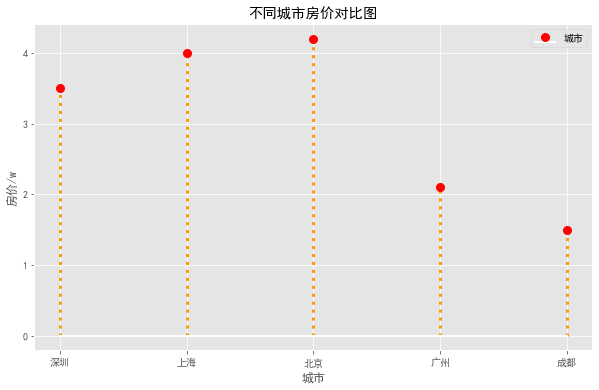

In [28]:
## 使用Matplotlib绘制火柴图（棒棒糖图）
data = pd.DataFrame({'city':['深圳', '上海', '北京', '广州', '成都'], 'house_price(w)':[3.5, 4.0, 4.2, 2.1, 1.5]})

plt.figure(figsize=(10,6))
markerline, stemlines, baseline = plt.stem(data['city'],data['house_price(w)'],bottom=0, label='城市')
plt.setp(markerline, color='red', marker='o',ms=8)  # marker点：火柴头 ms=markersize
plt.setp(stemlines, color='#FF9900', lw=3, ls=':' )    # 火柴杆  lw=linewidth
plt.setp(baseline, color='white', linewidth=2, ls='-')   # 基准线 ls=linestyle
plt.title("不同城市房价对比图")   # 设置标题
plt.xlabel("城市")    # 在axes1中设置x标签
plt.ylabel("房价/w")    # 在axes1中设置y标签
plt.legend()
plt.show()

D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 22323 (\N{CJK UNIFIED IDEOGRAPH-5733}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from

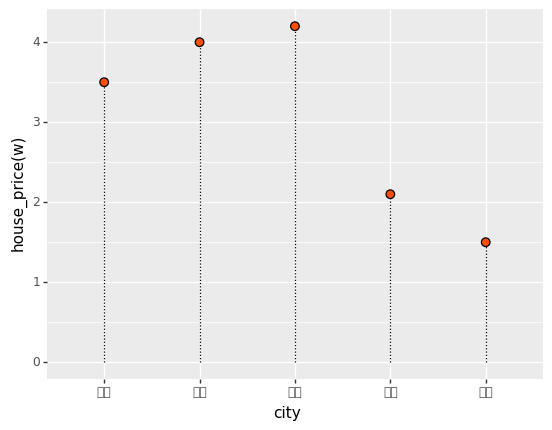

In [29]:
## 使用Plotnine绘制火柴图（棒棒糖图）
data = pd.DataFrame({'city':['深圳', '上海', '北京', '广州', '成都'], 'house_price(w)':[3.5, 4.0, 4.2, 2.1, 1.5]})
data['city'] = pd.Categorical(data['city'], ordered=True, categories=data['city'].unique())

p1 = (
    ggplot(data, aes(x='city', y='house_price(w)'))+
    geom_segment(aes(x='city', y=0, xend='city', yend='house_price(w)'), linetype="dotted")+
    geom_point(shape='o', size=3, color='black', fill='#FD4E07')+
    theme(text = element_text(family = "Songti SC"))
)
print(p1)


（3）哑铃图：

由于火柴杆图只能展示一个纬度的数值对比情况，如果想像多系列柱状图一样对比两个或多个因素的数值变化情况，又不想像柱状图一样浪费许多绘图空间，那么哑铃图是个不错的选择。

   城市  2021房价  2022房价
0  上海     4.0     4.2
1  北京     4.2     4.3
2  广州     2.1     1.6
3  成都     1.5     1.9
4  深圳     3.5     4.0


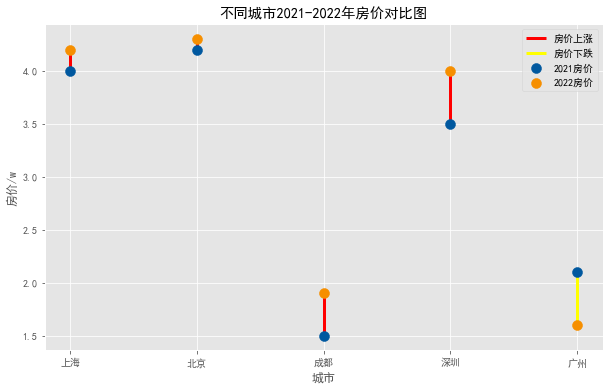

In [30]:
## Matplotlib绘制哑铃图：对比不同城市2021-2022年的房价情况
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})
tmp=data.set_index(['城市','年份'])['房价(w)'].unstack()
data=tmp.rename_axis(columns=None).reset_index()
data.columns = ['城市','2021房价','2022房价']
print(data)

plt.figure(figsize=(10,6))
plt.vlines(
    data.loc[data['2022房价'] - data['2021房价'] >= 0, '城市'],  
    ymin=data.loc[data['2022房价'] - data['2021房价'] >= 0, '2021房价'],
    ymax=data.loc[data['2022房价'] - data['2021房价'] >= 0, '2022房价'],
    color='red',
    label='房价上涨',
    zorder=1, 
    lw=3,
    )                       # 绘制端点之间的连线
plt.vlines(
    data.loc[data['2022房价'] - data['2021房价'] <= 0, '城市'], 
    ymin=data.loc[data['2022房价'] - data['2021房价'] <= 0, '2021房价'],
    ymax=data.loc[data['2022房价'] - data['2021房价'] <= 0, '2022房价'],
    color='yellow',
    label='房价下跌',
    zorder=1, 
    lw=3,
    )                       # 绘制端点之间的连线
plt.scatter(x=data['城市'], y=data['2021房价'], color='#00589F', s=100,  label='2021房价')  # 绘制哑铃图的端点
plt.scatter(x=data['城市'], y=data['2022房价'], color='#F68F00', s=100,  label='2022房价')  # 绘制哑铃图的另一个端点
plt.title("不同城市2021-2022年房价对比图")   # 设置标题
plt.xlabel("城市")    # 设置x标签
plt.ylabel("房价/w")    # 设置y标签
plt.legend()
plt.show()

D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from

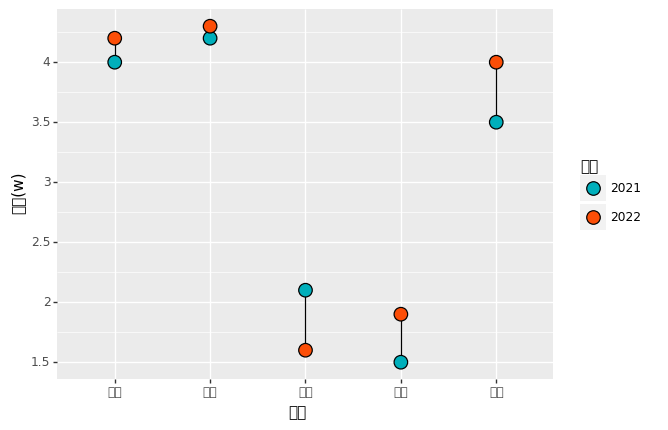

In [31]:
## Plotnine绘制哑铃图：对比不同城市2021-2022年的房价情况
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})
data['年份'] = pd.Categorical(data['年份'], ordered=True, categories=data['年份'].unique())

p1 = (
    ggplot(data, aes(x='城市', y='房价(w)', fill='年份'))+
    geom_line(aes(group='城市'))+
    geom_point(shape='o', size=5, color='black')+
    scale_fill_manual(values=('#00AFBB', '#FC4E07', '#36BED9'))+
    theme(text = element_text(family = "Songti SC"))
)
print(p1)

（4）坡度图：

以上的柱状图、多系列柱状图以及火柴杆和哑铃图等等都是机遇柱状图的推广，坡度图可以看多折线图的推广。坡度图可以很好的比较各个类别在两个不同时间点或者两种不同状态下的数值数据的变化，表现的内容与哑铃图大同小异。

   城市  2021房价  2022房价
0  上海     4.0     4.2
1  北京     4.2     4.3
2  广州     2.1     1.6
3  成都     1.5     1.9
4  深圳     3.5     4.0


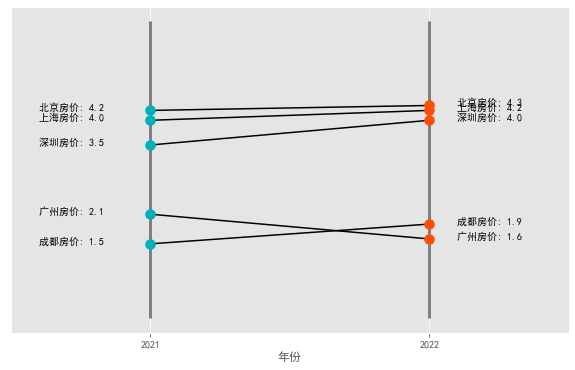

In [32]:
## Matplotlib绘制坡度图：对比不同城市2021-2022年的房价情况
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})
tmp=data.set_index(['城市','年份'])['房价(w)'].unstack()
data=tmp.rename_axis(columns=None).reset_index()
data.columns = ['城市','2021房价','2022房价']
print(data)

plt.figure(figsize=(10,6))
plt.vlines(x=[2021, 2022], ymin=0, ymax=len(data)+1, lw=3, color='gray', zorder=1)
for i in range(len(data)):
    plt.plot([2021, 2022], data.iloc[i, 1:3].values, color='black', zorder=2)
    plt.text(x=2021-0.4, y=data.iloc[i, 1], s=data.iloc[i, 0]+"房价: "+str(data.iloc[i, 1]))
    plt.text(x=2022+0.1, y=data.iloc[i, 2], s=data.iloc[i, 0]+"房价: "+str(data.iloc[i, 2]))
plt.scatter(x=[2021]*len(data), y=data['2021房价'], s=100, color='#00AFBB', zorder=3)
plt.scatter(x=[2022]*len(data), y=data['2022房价'], s=100, color='#FC4E07', zorder=3)
plt.xlim(2020.5,2022.5)
plt.xticks([2021,2022], ['2021', '2022'])
plt.yticks([]) # 不显示y轴
plt.xlabel("年份")
plt.show()

   城市  2021房价  2022房价
0  上海     4.0     4.2
1  北京     4.2     4.3
2  广州     2.1     1.6
3  成都     1.5     1.9
4  深圳     3.5     4.0


D:\conda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
D:\conda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
D:\conda3\lib\site-packages\plotnine\scales\scales.py:29: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

D:\conda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
D:\conda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: In a future v

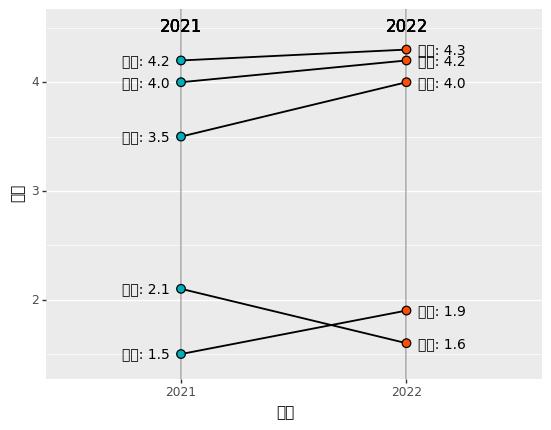

In [33]:
## Plotnine绘制坡度图：对比不同城市2021-2022年的房价情况
data = pd.DataFrame({
    '城市':['深圳', '上海', '北京', '广州', '成都', '深圳', '上海', '北京', '广州', '成都'],
    '年份':[2021,2021,2021,2021,2021,2022,2022,2022,2022,2022],
    '房价(w)':[3.5, 4.0, 4.2, 2.1, 1.5, 4.0, 4.2, 4.3, 1.6, 1.9]
})
tmp=data.set_index(['城市','年份'])['房价(w)'].unstack()
data=tmp.rename_axis(columns=None).reset_index()
data.columns = ['城市','2021房价','2022房价']
print(data)

left_label = data.apply(lambda x: x['城市']+": "+str(x['2021房价']), axis=1)
right_label = data.apply(lambda x: x['城市']+": "+str(x['2022房价']), axis=1)

p1 = (
    ggplot(data)+
    geom_segment(aes(x=1, xend=2, y='2021房价', yend='2022房价'), size=0.75, color='black', show_legend=False)+
    geom_vline(xintercept=1, linetype='solid', size=0.2)+
    geom_vline(xintercept=2, linetype='solid', size=0.2)+
    geom_point(aes(x=1, y='2021房价'), size=3, shape='o', fill='#00AFBB', color='black')+
    geom_point(aes(x=2, y='2022房价'), size=3, shape='o', fill='#FC4E07', color='black')+
    xlim(0.75, 2.25)+
    ylim(0.95*np.min(np.min(data[['2021房价', '2022房价']])), 1.05*np.max(np.max(data[['2021房价', '2022房价']])))+
    scale_x_discrete(limits = ("2021", "2022"))+
    xlab("年份")+
    ylab("房价")+
    geom_text(label=left_label, x=0.95, y=data['2021房价'], size=10, ha='right')+
    geom_text(label=right_label, x=2.05, y=data['2022房价'], size=10, ha='left')+
    geom_text(label='2021', x=1, y=1.05*np.max(np.max(data[['2021房价', '2022房价']])), size=12)+
    geom_text(label='2022', x=2, y=1.05*np.max(np.max(data[['2021房价', '2022房价']])), size=12)+
    theme(text = element_text(family = "Songti SC"))
)
print(p1)


（5）雷达图：

雷达图可以展示多个变量在不同属性上的数值对比，如：十个员工在职场中五种能力的分数对比、英雄联盟每个英雄在每个属性的数值分数对比等等。由于Plotnine没有实现极坐标，因此只能使用Matplotlib绘制雷达图。

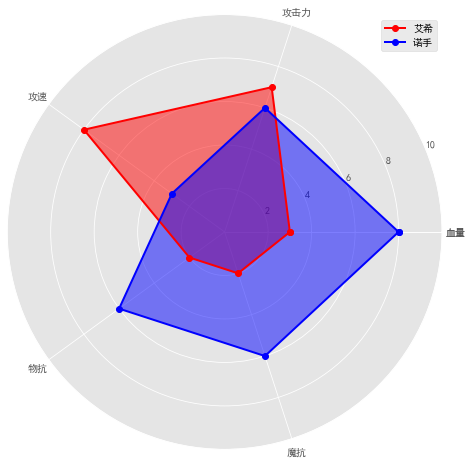

In [34]:
# 使用Matplotlib绘制雷达图：英雄联盟几位英雄的能力对比
data = pd.DataFrame({
    '属性': ['血量', '攻击力', '攻速', '物抗', '魔抗'],
    '艾希':[3, 7, 8, 2, 2],
    '诺手':[8, 6, 3, 6, 6]
})

plt.figure(figsize=(8,8))
theta = np.linspace(0, 2*np.pi, len(data), endpoint=False)   # 每个坐标点的位置
theta = np.append(theta, theta[0])  # 让数据封闭
aixi = np.append(data['艾希'].values,data['艾希'][0])  #让数据封闭
nuoshou = np.append(data['诺手'].values,data['诺手'][0])  # 让数据封闭
shuxing = np.append(data['属性'].values,data['属性'][0])  # 让数据封闭

plt.polar(theta, aixi, 'ro-', lw=2, label='艾希') # 画出雷达图的点和线
plt.fill(theta, aixi, facecolor='r', alpha=0.5) # 填充
plt.polar(theta, nuoshou, 'bo-', lw=2, label='诺手')  # 画出雷达图的点和线
plt.fill(theta, nuoshou, facecolor='b', alpha=0.5) # 填充
plt.thetagrids(theta/(2*np.pi)*360, shuxing)  # 为每个轴添加标签
plt.ylim(0,10)
plt.legend()
plt.show()


### 5.2 关系型图表：

（1）散点图：

散点图是最常见的用于描述两者关系的图表之一，一般用于描述数值变量与数值变量之间的关系，如：收入与消费之间的关系，一氧化氮（空气污染物）的浓度与当地放假之间的关系等等。散点图可以为看图者提供一下信息：
- 变量之间是否存在关联关系；
- 如果存在关联关系，那么变量之间的关联关系是正向关联还是负向关联；
- 如果存在变量关系，那么是线性关联还是非线性关联；
- 是否存在趋势之外的点：离群点；

下面是用一个案例说明以上信息：

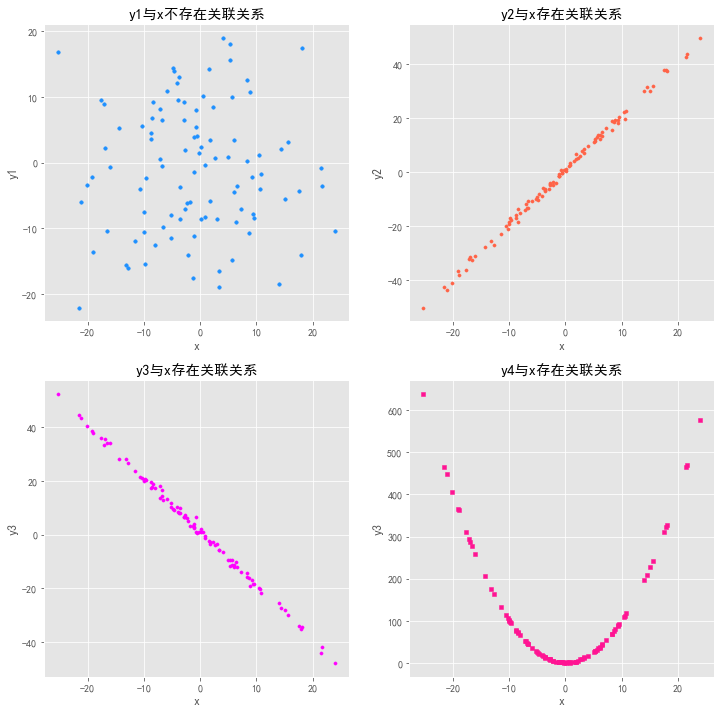

In [35]:
# 使用Matplotlib和四个图说明相关关系：
x = np.random.randn(100)*10
y1 = np.random.randn(100)*10
y2 = 2 * x + 1 + np.random.randn(100)
y3 = -2 * x + 1 + np.random.randn(100)
y4 = x**2 + 1 + np.random.randn(100)


plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)  #创建两行两列的子图，并绘制第一个子图
plt.scatter(x, y1, c='dodgerblue', marker=".", s=50)
plt.xlabel("x")
plt.ylabel("y1")
plt.title("y1与x不存在关联关系")

plt.subplot(2,2,2)  #创建两行两列的子图，并绘制第二个子图
plt.scatter(x, y2, c='tomato', marker="o", s=10)
plt.xlabel("x")
plt.ylabel("y2")
plt.title("y2与x存在关联关系")

plt.subplot(2,2,3)  #创建两行两列的子图，并绘制第三个子图
plt.scatter(x, y3, c='magenta', marker="o", s=10)
plt.xlabel("x")
plt.ylabel("y3")
plt.title("y3与x存在关联关系")

plt.subplot(2,2,4)  #创建两行两列的子图，并绘制第四个子图
plt.scatter(x, y4, c='deeppink', marker="s", s=10)
plt.xlabel("x")
plt.ylabel("y3")
plt.title("y4与x存在关联关系")

plt.show()

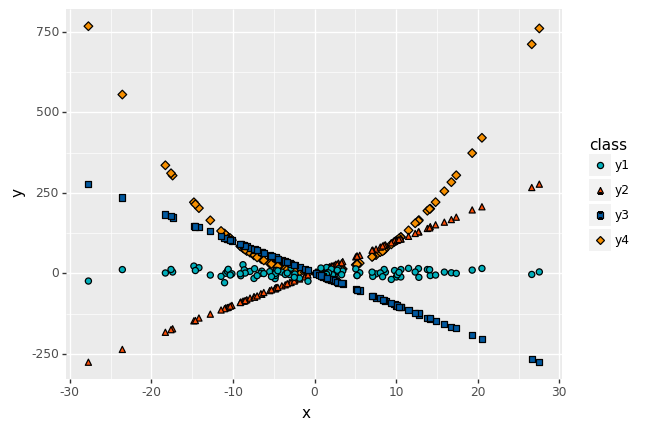

In [36]:
# 使用Plotnine和四个图说明相关关系：
x = np.random.randn(100)*10
y1 = np.random.randn(100)*10
y2 = 10 * x + 1 + np.random.randn(100)
y3 = -10 * x + 1 + np.random.randn(100)
y4 = x**2 + 1 + np.random.randn(100)

df = pd.DataFrame({
    'x': np.concatenate([x,x,x,x]),
    'y': np.concatenate([y1, y2, y3, y4]),
    'class': ['y1']*100 + ['y2']*100 + ['y3']*100 + ['y4']*100
})

p1 = (
    ggplot(df)+
    geom_point(aes(x='x', y='y', fill='class', shape='class'), color='black', size=2)+
    scale_fill_manual(values=('#00AFBB', '#FC4E07', '#00589F', '#F68F00'))+
    theme(text = element_text(family = "Songti SC"))
)
print(p1)

（2）带趋势线的散点图：

一般来说，靠肉眼观察到的趋势性规律往往不具备说服力，在统计学中能够解释趋势关系的方法是：回归。因此，如果在散点图的基础上添加回归的趋势线，将会使得我们的关系更加具备说服力。回归方法在统计学中常有：参数型回归和非参数型回归，参数回归的代表为线性回归、多项式回归、指数回归、对数回归等等，而非参数回归的代表有LOESS数据平滑方法、GAM模型、样条数据平滑方法。

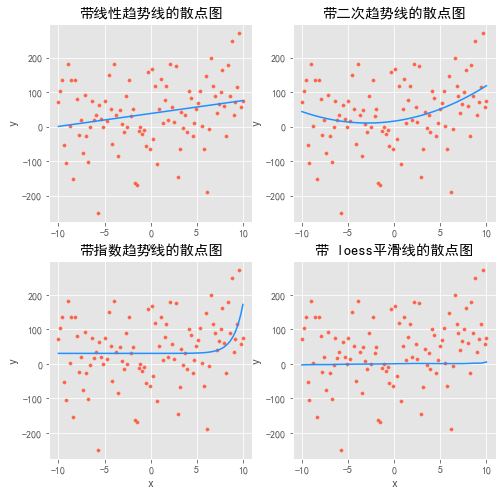

In [37]:
# 使用Matplotlib绘制具备趋势线的散点图
from sklearn.linear_model import LinearRegression  #线性回归等参数回归
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures  # 构造多项式
x = np.linspace(-10, 10, 100)
y = np.square(x) + np.random.randn(100)*100
x_poly2 = PolynomialFeatures(degree=2).fit_transform(x.reshape(-1, 1))
y_linear_pred = LinearRegression().fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))
y_poly_pred = LinearRegression().fit(x_poly2, y).predict(x_poly2)
y_exp_pred = LinearRegression().fit(np.exp(x).reshape(-1, 1), y).predict(np.exp(x).reshape(-1, 1))
y_loess_pred = sm.nonparametric.lowess(x, y, frac=2/3)[:, 1]

plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.scatter(x, y, c='tomato', marker="o", s=10)
plt.plot(x, y_linear_pred, c='dodgerblue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("带线性趋势线的散点图")

plt.subplot(2,2,2)
plt.scatter(x, y, c='tomato', marker="o", s=10)
plt.plot(x, y_poly_pred, c='dodgerblue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("带二次趋势线的散点图")

plt.subplot(2,2,3)
plt.scatter(x, y, c='tomato', marker="o", s=10)
plt.plot(x, y_exp_pred, c='dodgerblue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("带指数趋势线的散点图")

plt.subplot(2,2,4)
plt.scatter(x, y, c='tomato', marker="o", s=10)
plt.plot(x, y_loess_pred, c='dodgerblue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("带 loess平滑线的散点图")

plt.show()

<div class="alert alert-warning" role="alert">
  注：需要安装scikit-misc，命令：pip install scikit-misc

</div>


In [91]:
# # 使用Plotnine绘制具备趋势线的散点图：
# # method参数有'lm', 'ols', 'wls','rlm', 'glm', 'gls', 'lowess', 'loess', 'mavg', 'gpr'
# import skmisc
# x = np.linspace(-10, 10, 100)
# y = np.sin(x) + np.random.randn(100)
# df = pd.DataFrame({
#     'x': x,
#     'y': y
# })

# p1 = (
#     ggplot(df, aes('x', 'y'))+
#     geom_point(fill='#00589F', color='black', size=3, shape='o')+
#     geom_smooth(method='lm', span=0.4, se=True, color='#FC4E07', fill='#FC4E07', alpha=0.2)+
#     scale_y_continuous(breaks=np.arange(-10, 10, 25))+
#     labs(x="x", y="y", title="带线性趋势线的散点图")+
#     theme(text = element_text(family = "Songti SC"))
# )
# p2 = (
#     ggplot(df, aes('x', 'y'))+
#     geom_point(fill='#00589F', color='black', size=3, shape='o')+
#     geom_smooth(method='loess', span=0.4, se=True, color='#FC4E07', fill='#FC4E07', alpha=0.2)+
#     scale_y_continuous(breaks=np.arange(-10, 10, 25))+
#     labs(x="x", y="y", title="带loess平滑的散点图")+
#     theme(text = element_text(family = "Songti SC"))
# )
# p3 = (
#     ggplot(df, aes('x', 'y'))+
#     geom_point(fill='#00589F', color='black', size=3, shape='o')+
#     geom_smooth(method='glm', span=0.4, se=True, color='#FC4E07', fill='#FC4E07', alpha=0.2)+
#     scale_y_continuous(breaks=np.arange(-10, 10, 25))+
#     labs(x="x", y="y", title="带glm模型的散点图")+
#     theme(text = element_text(family = "Songti SC"))
# )
# print([p1, p2, p3])

（3）Q-Q图和P-P图：

在许多的统计假设检验以及统计模型中，很多模型的假设都是使用正态分布作为模型的基础假设之一，如线性回归的正态性假设，那么就意味着我们需要对现有的数据与正态分布进行对比。还有一种情况就是，我们需要对现有的数据是否服从某种特定分布，如：指数分布、均匀分布等等。Q-Q图与P-P图可以帮助我们简单解决这个问题而避免复杂的非参数检验：
- Q-Q图：Q-Q图的横纵坐标分别是理论的分位数和样本的分位数，如果Q-Q图接近$y=x$直线，则认为样本符合某个分布；
- P-P图：P-P图的横纵坐标是理论的累积分布函数和样本的累积分布，如果P-P图接近于$y=x$那么认为样本符合某个分布。而当P-P图不是一条直线，有一定的规律，那么可以考虑对变量做一定的变换使得变换后的数据服从该分布。

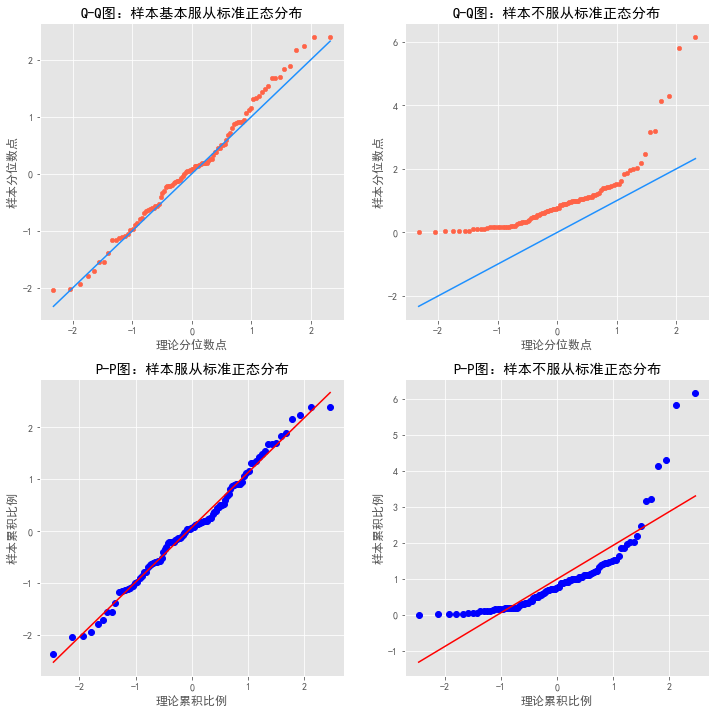

In [39]:
# 使用Matplotlib绘制QQ图与PP图
from scipy import stats
sample_norm = np.random.randn(100)   #构造正态分布的样本
sample_exp = np.random.exponential(1, 100) #构造指数分布的样本
sort_sample_norm = np.sort(sample_norm)  #假设为正态分布样本的分位数
sort_sample_exp = np.sort(sample_exp)  #假设为指数分布样本的分位数
theory_norm = stats.norm.ppf(np.arange(100) / 100) #正态分布理论分位数
sample_norm_cdf = stats.norm.cdf(sort_sample_norm) # 正态分布理论累积分布
sample_exp_cdf = stats.norm.cdf(sort_sample_exp) # 正态分布理论累积分布

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.scatter(theory_norm, sort_sample_norm, c='tomato', marker="o", s=20)
plt.plot(theory_norm, theory_norm, c='dodgerblue')
plt.xlabel("理论分位数点")
plt.ylabel("样本分位数点")
plt.title("Q-Q图：样本基本服从标准正态分布")

plt.subplot(2,2,2)
plt.scatter(theory_norm, sort_sample_exp, c='tomato', marker="o", s=20)
plt.plot(theory_norm, theory_norm, c='dodgerblue')
plt.xlabel("理论分位数点")
plt.ylabel("样本分位数点")
plt.title("Q-Q图：样本不服从标准正态分布")

plt.subplot(2,2,3)
stats.probplot(sample_norm, plot=plt)
plt.xlabel("理论累积比例")
plt.ylabel("样本累积比例")
plt.title("P-P图：样本服从标准正态分布")

plt.subplot(2,2,4)
stats.probplot(sample_exp, plot=plt)
plt.xlabel("理论累积比例")
plt.ylabel("样本累积比例")
plt.title("P-P图：样本不服从标准正态分布")

plt.show()


D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from

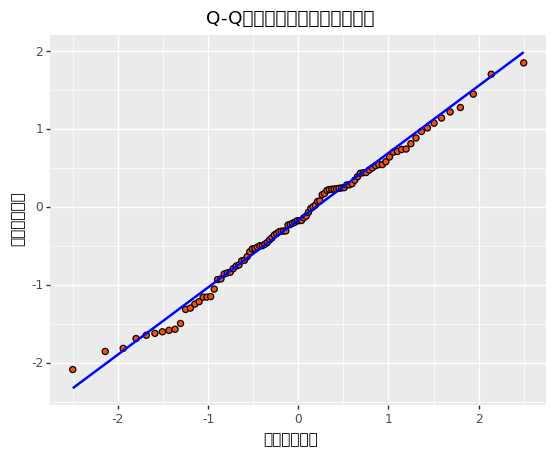

D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
D:\conda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from

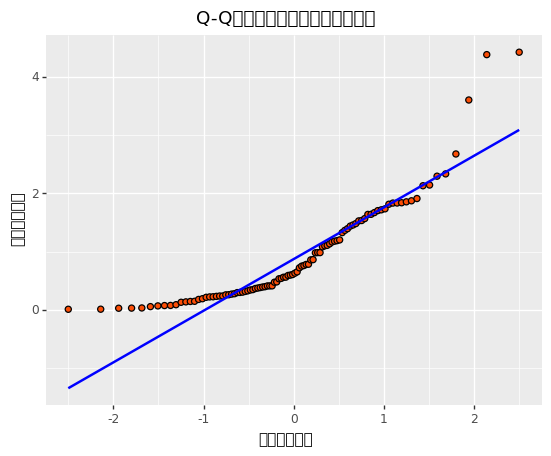

[<ggplot: (147028137063)>, <ggplot: (147028569357)>]


In [40]:
# 使用Plotnine绘制QQ图
sample_norm = np.random.randn(100)   #构造正态分布的样本
sample_exp = np.random.exponential(1, 100) #构造指数分布的样本
df = pd.DataFrame({
    'sample_norm': sample_norm,
    'sample_exp': sample_exp
})

p1 = (
    ggplot(data=df, )+
    geom_qq(aes(sample='sample_norm'),shape='o', fill='#FC4E07', color='black', size=2)+
    geom_qq_line(aes(sample='sample_norm'), color='blue', size=1)+
    labs(x="理论分位数点", y="样本分位数点", title="Q-Q图：样本服从标准正态分布")+
    theme(text = element_text(family = "Songti SC"))
)

p2 = (
    ggplot(data=df, )+
    geom_qq(aes(sample='sample_exp'),shape='o', fill='#FC4E07', color='black', size=2)+
    geom_qq_line(aes(sample='sample_exp'), color='blue', size=1)+
    labs(x="理论分位数点", y="样本分位数点", title="Q-Q图：样本不服从标准正态分布")+
    theme(text = element_text(family = "Songti SC"))
)
print([p1, p2])



（4）聚类散点图：

很多时候，我们不仅需要知道x和y之间是什么关系，也想知道不同类型的x和y之间是什么关系，如：深圳和广州的不同地区平均收入与房价之间的关系，中国和美国CPI与GDP的关系等等。

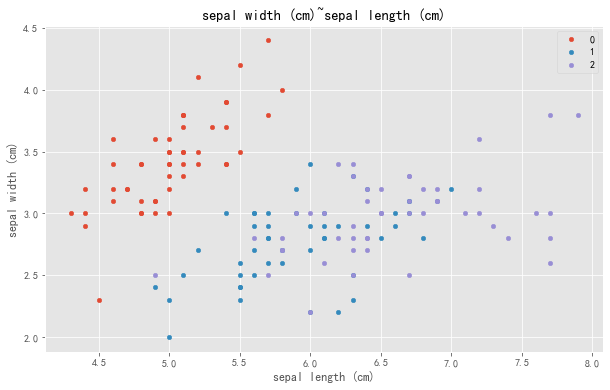

In [41]:
# 使用Matplotlib绘制聚类散点图
from sklearn.datasets import load_iris  #家在鸢尾花数据集
iris = load_iris()
X = iris.data
label = iris.target
feature = iris.feature_names
df = pd.DataFrame(X, columns=feature)
df['label'] = label

label_unique = np.unique(df['label']).tolist()
plt.figure(figsize=(10, 6))
for i in label_unique:
    df_label = df.loc[df['label'] == i, :]
    plt.scatter(x=df_label['sepal length (cm)'], y=df_label['sepal width (cm)'], s=20, label=i)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('sepal width (cm)~sepal length (cm)')
plt.legend()
plt.show()

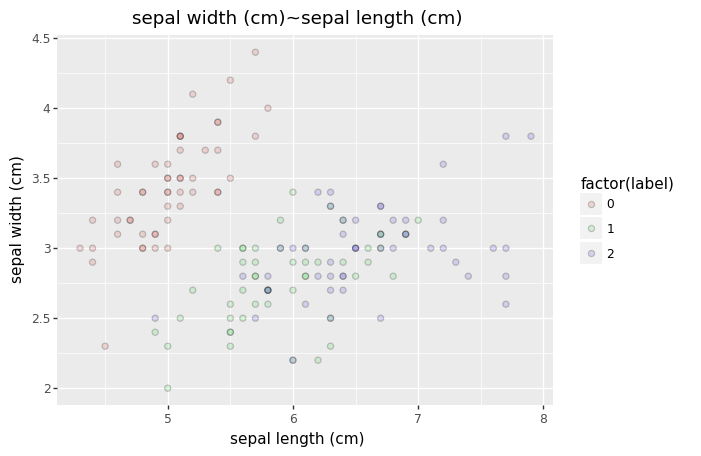

In [42]:
# 使用Plotnine绘制聚类散点图
from sklearn.datasets import load_iris  #家在鸢尾花数据集
iris = load_iris()
X = iris.data
label = iris.target
feature = iris.feature_names
df = pd.DataFrame(X, columns=feature)
df['label'] = label

p1 = (
    ggplot(df, aes(x='sepal length (cm)', y='sepal width (cm)', fill='factor(label)'))+
    geom_point(alpha=0.2, color='black', size=2)+
    labs(title="sepal width (cm)~sepal length (cm)")+
    theme(text = element_text(family = "Songti SC"))
)
print(p1)

（5）相关系数矩阵图：

以上的散点图，最多只能说明三个维度之间的关系，更高层次的相关性信息无法通过二维散点图表示。相关系数矩阵图其实就是相关系数矩阵的可视化图表，相关系数矩阵的每一个点都是表示某两个变量之间的相关系数。

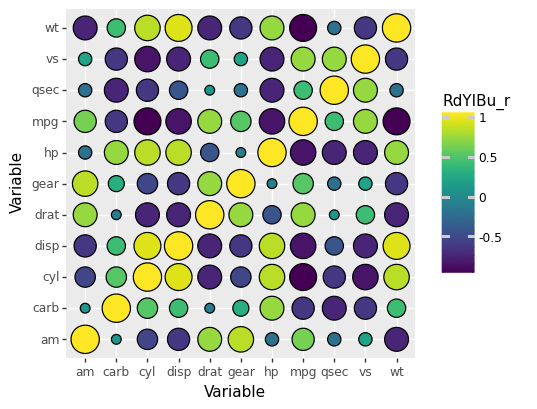

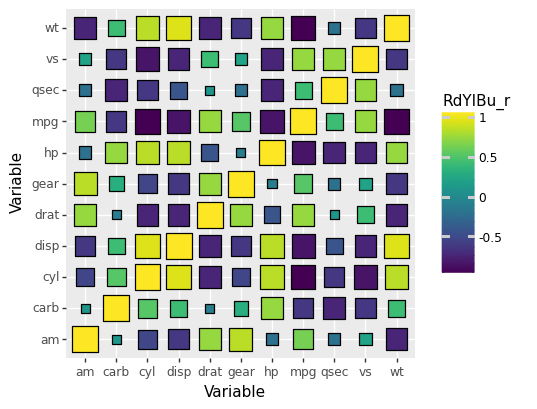

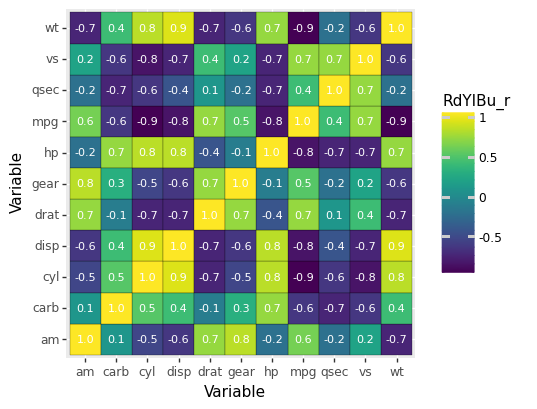

[<ggplot: (147025601374)>, <ggplot: (147024802756)>, <ggplot: (147024808653)>]


In [43]:
# 使用plotnine绘制相关系数矩阵图：
from plotnine.data import mtcars
corr_mat = np.round(mtcars.corr(), 1).reset_index() #计算相关系数矩阵
df = pd.melt(corr_mat, id_vars='index', var_name='variable', value_name='corr_xy') #将矩阵宽数据变成长数据
df['abs_corr'] = np.abs(df['corr_xy'])
p1 = (
    ggplot(df, aes(x='index', y='variable', fill='corr_xy', size='abs_corr'))+
    geom_point(shape='o', color='black')+
    scale_size_area(max_size=11, guide=False)+
    scale_fill_cmap(name='RdYIBu_r')+
    coord_equal()+
    labs(x="Variable", y="Variable")+
    theme(dpi=100, figure_size=(4.5,4.55))
)
p2 = (
    ggplot(df, aes(x='index', y='variable', fill='corr_xy', size='abs_corr'))+
    geom_point(shape='s', color='black')+
    scale_size_area(max_size=10, guide=False)+
    scale_fill_cmap(name='RdYIBu_r')+
    coord_equal()+
    labs(x="Variable", y="Variable")+
    theme(dpi=100, figure_size=(4.5,4.55))
)
p3 = (
    ggplot(df, aes(x='index', y='variable', fill='corr_xy', label='corr_xy'))+
    geom_tile(color='black')+
    geom_text(size=8, color='white')+
    scale_fill_cmap(name='RdYIBu_r')+
    coord_equal()+
    labs(x="Variable", y="Variable")+
    theme(dpi=100, figure_size=(4.5,4.55))
)
print([p1, p2, p3])

<AxesSubplot:>

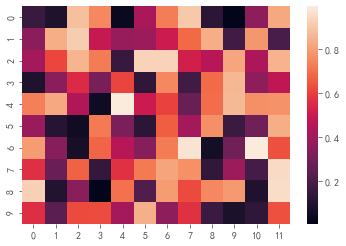

In [44]:
# 使用Matplotlib/Seaborn绘制相关系数矩阵图
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data)

### 5.3 数据分布型图表

什么是数据的分布呢？所谓数据的分布，其实就是数据在哪里比较密集，那里比较稀疏，描述数据的密集或者稀疏情况实际上可以用频率或者概率。

（1）统计直方分布图：（统计直方图）

直方图的思想十分简单，既然想要描述数据的聚集和稀疏情况，那么最简单的就是将数据分成不同的区间，计算区间内的数据量就可以了。区间内的数据量大，证明数据在区间附近密集，反之则稀疏。

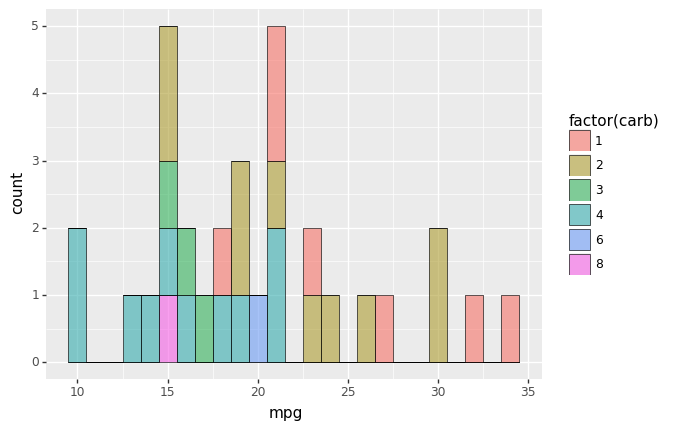

In [45]:
# 使用plotnine绘制直方图：
from plotnine.data import mtcars

p1 = (
    ggplot(mtcars, aes(x='mpg', fill='factor(carb)'))+
    geom_histogram(binwidth=1, alpha=0.6, color='black', size=0.25)+
    scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
)
print(p1)

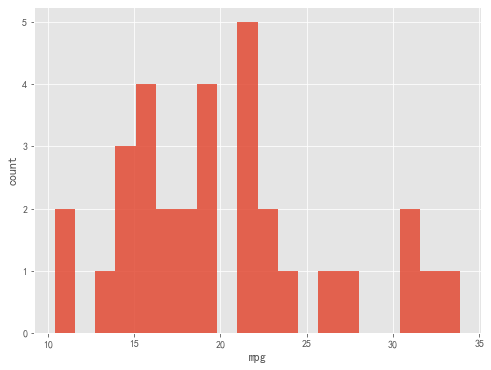

In [46]:
# 使用matplotlib绘制直方图：
plt.figure(figsize=(8, 6))
plt.hist(mtcars['mpg'], bins=20, alpha=0.85)
plt.xlabel("mpg")
plt.ylabel("count")
plt.show()

（2）核密度图：

直方图使用的是离散的区间内的频数来描述聚集和离散信息，能不能使用连续的曲线描述呢？实际上，使用连续曲线描述描述数据的聚集和离散信息的图称为：核密度图。

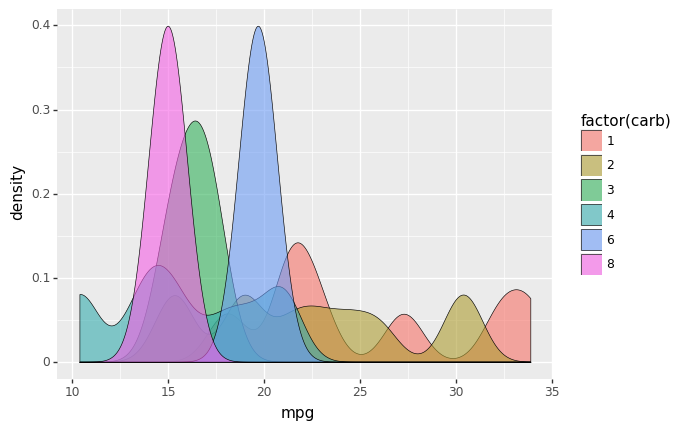

In [47]:
# 使用plotnine绘制核密度图：
from plotnine.data import mtcars

p1 = (
    ggplot(mtcars, aes(x='mpg', fill='factor(carb)'))+
    geom_density(bw=1, alpha=0.6, color='black', size=0.25)+
    scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
)
print(p1)

（3）箱线图：

描述某个变量的分布其实不仅仅使用密度函数和分布函数，也可以使用随机变量的数字特征，数字特征是反应某个随机变量的某方面特点的数值量。箱线图可以反应随机变量的分位数特征，通过箱线图的观察，可以知道变量的位置信息：

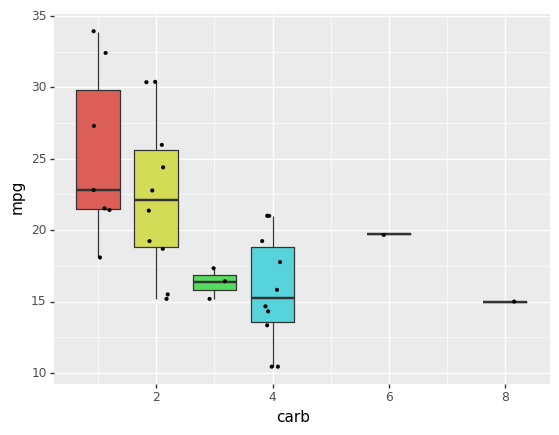

In [48]:
# 使用plotnine绘制的箱线图：
from plotnine.data import mtcars
p1 = (
    ggplot(mtcars, aes(x='carb', y='mpg', fill='factor(carb)'))+
    geom_boxplot(show_legend=False)+
    geom_jitter(fill='black', shape='.', width=0.2, size=3, stroke=0.1, show_legend=False)
)
print(p1)

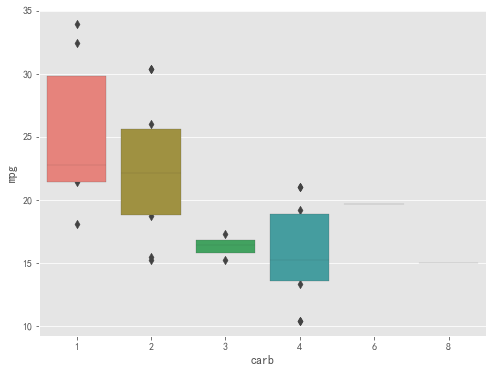

In [49]:
# 使用matplotlib绘制箱线图
import seaborn as sns 
from plotnine.data import mtcars

data = mtcars
data['carb'] = data['carb'].astype('category')
plt.figure(figsize=(8, 6))
sns.boxenplot(x='carb', y='mpg', data=mtcars, linewidth=0.2, palette=sns.husl_palette(6, s=0.9, l=0.65, h=0.0417))
plt.show()

有的时候，在理解箱线图时，不仅仅需要看数据是否在主体的“箱子”内，还需要注意每个箱子的数据量，因为在进行统计推断时，数据量能显著影响分析结论的稳定性，一般来说数据越多，结论越可靠。在箱线图中，我们可以使用箱子的宽度不同，体现每个箱子的数据量的多少。

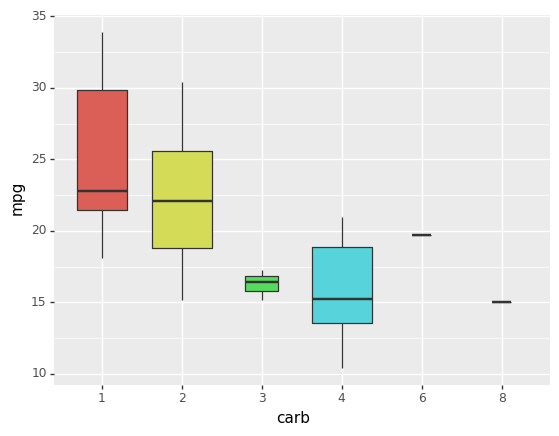

In [50]:
# 使用plotnine绘制的箱线图：
from plotnine.data import mtcars
p1 = (
    ggplot(mtcars, aes(x='carb', y='mpg', fill='factor(carb)'))+
    geom_boxplot(notch=False, varwidth=True, show_legend=False)
)
print(p1)

（4）提琴图：

之前的直方图只能反映数据的密度信息，箱线图只能反映数据的位置信息，有没有一种图可以将数据的密度信息和位置信息结合起来呢？有，这个图叫做：提琴图！

D:\conda3\lib\site-packages\plotnine\stats\stat_density.py:152: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
D:\conda3\lib\site-packages\plotnine\stats\stat_density.py:155: PlotnineWarning: Groups with fewer than 2 data points have been removed.
D:\conda3\lib\site-packages\plotnine\stats\stat_density.py:152: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
D:\conda3\lib\site-packages\plotnine\stats\stat_density.py:155: PlotnineWarning: Groups with fewer than 2 data points have been removed.


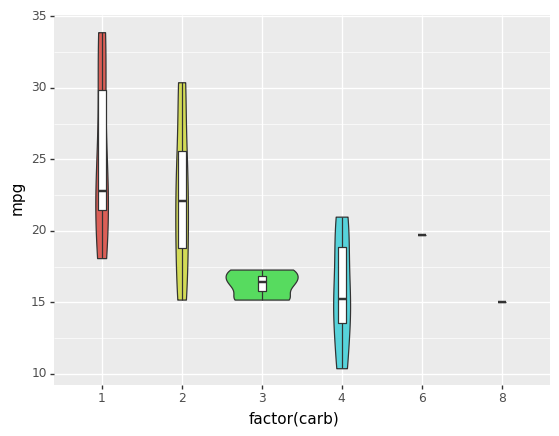

In [51]:
# 使用Plotnine绘制提琴图：
from plotnine.data import mtcars

p1 = (
    ggplot(mtcars, aes(x='factor(carb)', y='mpg', fill='factor(carb)'))+
    geom_violin(show_legend=False)+
    geom_boxplot(fill='white', width=0.1, show_legend=False)
   )
print(p1)

（5）饼状图/环状图：

“分布”这个词有时候不仅仅局限在统计学的理论范畴，还会出现在实际业务中，如：不同分类下的占比情况可以叫分布。饼状图/环状图在实际业务中经常用来表示不同分类下的占比情况，如：中国上网人数中不同群体的人数占比等等。

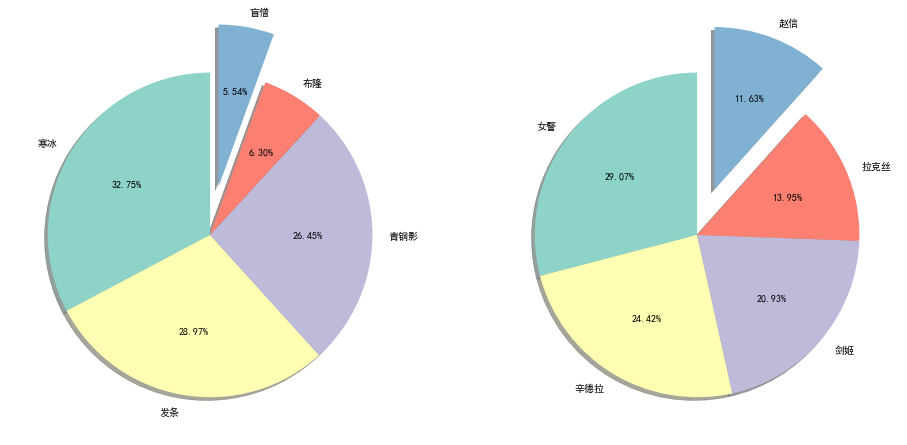

In [52]:
# 使用Matplotlib绘制饼状图：
from matplotlib import cm, colors
df = pd.DataFrame({
    '己方': ['寒冰', '布隆', '发条', '盲僧', '青钢影'],
    '敌方': ['女警', '拉克丝', '辛德拉', '赵信', '剑姬'],
    '己方输出': [26000, 5000, 23000, 4396, 21000],
    '敌方输出': [25000, 12000, 21000, 10000, 18000]
})

df_our = df[['己方', '己方输出']].sort_values(by='己方输出', ascending=False).reset_index()
df_other = df[['敌方', '敌方输出']].sort_values(by='敌方输出', ascending=False).reset_index()
color_list = [cm.Set3(i) for i in range(len(df))]
plt.figure(figsize=(16, 10))
plt.subplot(1,2,1)
plt.pie(df_our['己方输出'].values, startangle=90, shadow=True, colors=color_list, labels=df_our['己方'].tolist(), explode=(0,0,0,0,0.3), autopct='%.2f%%')


plt.subplot(1,2,2)
plt.pie(df_other['敌方输出'].values, startangle=90, shadow=True, colors=color_list, labels=df_other['敌方'].tolist(), explode=(0,0,0,0,0.3), autopct='%.2f%%')

plt.show()

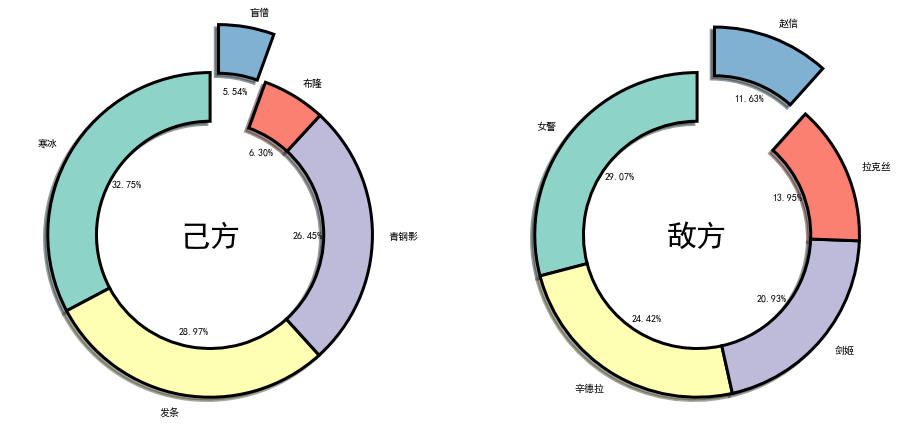

In [53]:
# 使用Matplotlib绘制环状图：
from matplotlib import cm, colors
df = pd.DataFrame({
    '己方': ['寒冰', '布隆', '发条', '盲僧', '青钢影'],
    '敌方': ['女警', '拉克丝', '辛德拉', '赵信', '剑姬'],
    '己方输出': [26000, 5000, 23000, 4396, 21000],
    '敌方输出': [25000, 12000, 21000, 10000, 18000]
})

df_our = df[['己方', '己方输出']].sort_values(by='己方输出', ascending=False).reset_index()
df_other = df[['敌方', '敌方输出']].sort_values(by='敌方输出', ascending=False).reset_index()
color_list = [cm.Set3(i) for i in range(len(df))]
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}
plt.figure(figsize=(16, 10))
plt.subplot(1,2,1)
plt.pie(df_our['己方输出'].values, startangle=90, shadow=True, colors=color_list, wedgeprops=wedgeprops, labels=df_our['己方'].tolist(), explode=(0,0,0,0,0.3), autopct='%.2f%%')
plt.text(0, 0, '己方' , ha='center', va='center', fontsize=30)

plt.subplot(1,2,2)
plt.pie(df_other['敌方输出'].values, startangle=90, shadow=True, colors=color_list, wedgeprops=wedgeprops, labels=df_other['敌方'].tolist(), explode=(0,0,0,0,0.3), autopct='%.2f%%')
plt.text(0, 0, '敌方' , ha='center', va='center', fontsize=30)
plt.show()

### 5.4 时间序列型图表

（1）时间序列线图：

折线图可以反映某个时间段内数值变量的趋势和关系，当只有一个线图时则可以反映趋势，而当有多个线图时，可以反映趋势的同时对比两者的关系。

In [55]:
# 使用Plotnine绘制时间序列线图：
df = pd.read_csv(
    './data/AirPassengers.csv'
    )  # 航空数据1949-1960

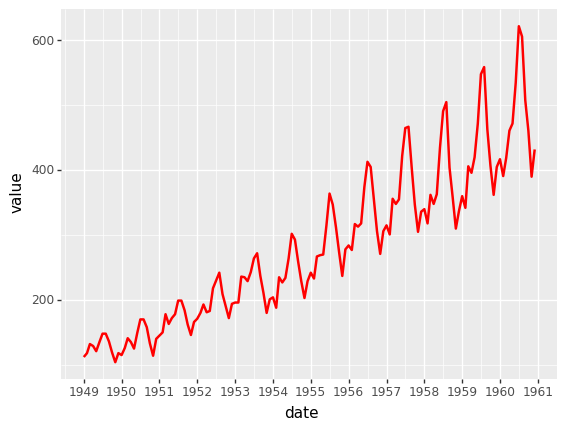

In [57]:
df['date'] = pd.to_datetime(df['date'])
p1 = (
    ggplot(df, aes(x='date', y='value'))+
    geom_line(size=1, color='red')+
    scale_x_date(date_labels="%Y", date_breaks="1 year")+
    xlab('date')+
    ylab('value')
)
print(p1)

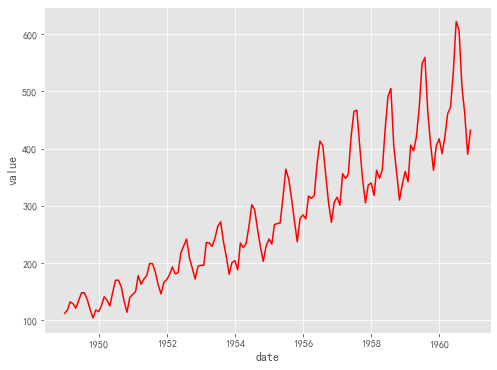

In [58]:
# 使用Matplotlib绘制时间序列折线图
plt.figure(figsize=(8,6))
plt.plot(df['date'], df['value'], color='red')
plt.xlabel("date")
plt.ylabel("value")
plt.show()

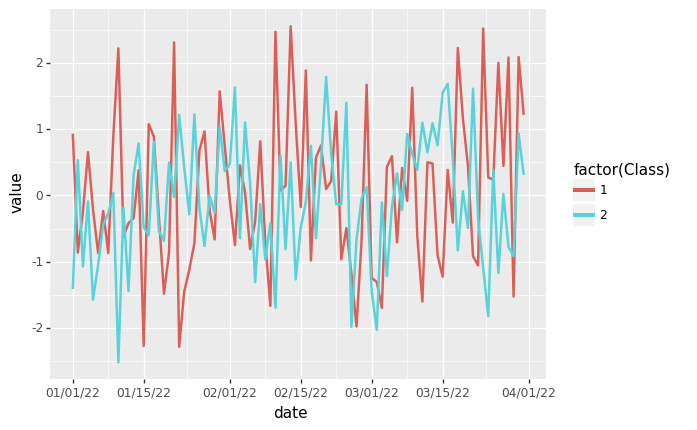

In [59]:
# Plotnine绘制多系列折线图
date_list = pd.date_range('2022-01-01', '2022-03-31').astype('str').tolist() * 2
value_list = np.random.randn(len(date_list))
Class = [1] * (len(date_list) // 2) + [2] * (len(date_list) // 2)
data = pd.DataFrame({
    'date_list': date_list,
    'value_list': value_list,
    'Class': Class
})

data['date_list'] = pd.to_datetime(data['date_list'])
p1 = (
    ggplot(data, aes(x='date_list', y='value_list', group='factor(Class)', color='factor(Class)'))+
    geom_line(size=1)+
    scale_x_date(date_labels="%D")+
    xlab('date')+
    ylab('value')
)
print(p1)

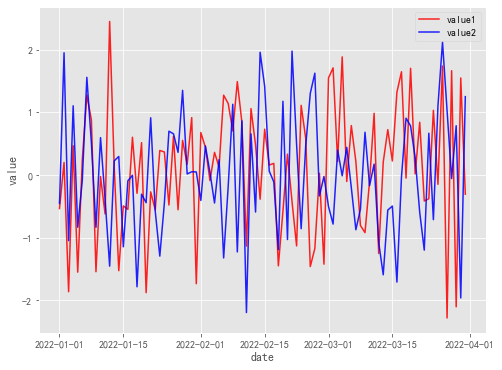

In [60]:
# Matplotlib 绘制多系列折线图
date_list = pd.date_range('2022-01-01', '2022-03-31').astype('str').tolist()
value_list1 = np.random.randn(len(date_list))
value_list2 = np.random.randn(len(date_list))
data = pd.DataFrame({
    'date_list': date_list,
    'value_list1': value_list1,
    'value_list2': value_list2
})
data['date_list'] = pd.to_datetime(data['date_list'])

plt.figure(figsize=(8, 6))
plt.plot(data['date_list'], data['value_list1'], color='red', alpha=0.86, label='value1')
plt.plot(data['date_list'], data['value_list2'], color='blue', alpha=0.86, label='value2')
plt.legend()
plt.xlabel('date')
plt.ylabel('value')
plt.show()

（2）日历图：

说到时间，不可不说日历，我们刚刚使用的是线图表达每天的数值变化大小，但是这个并不利于发现周期性的信息，如：每周五晚上火车站客流量也许是个高峰，每个月月初的进货达到高峰等等。这时候，我们可以使用日历图：

In [61]:
# 使用Plotnine绘制日历图：
df = pd.DataFrame({
    'date': pd.date_range('2021-01-01', '2021-12-31'),
    'value': np.abs(np.random.randn(len(pd.date_range('2021-01-01', '2021-12-31')))*10)
})

df['Year'] = df['date'].dt.year  # 哪一年
df['Month'] = df['date'].dt.month   # 哪个月
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month_label'] = df['Month'].replace(np.arange(1, 13, 1), month_list)  # 将月份转化成英文形式
df['Month_label'] = pd.Categorical(df['Month_label'], categories=month_list, ordered=True) # 数据由字符串变成Category格式
df['Week'] = [int(t.strftime('%W')) for t in df['date']]  # 第几周
df['Weekday'] = df['date'].dt.weekday + 1  # 星期几
weekday_list = ['mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['Weekday_label'] = df['Weekday'].replace(np.arange(1, 8, 1), weekday_list) #将星期几换成英文
df['Weekday_label'] = pd.Categorical(df['Weekday_label'], categories=weekday_list, ordered=True) # 数据由字符串变成Category格式
df['Day'] = df['date'].dt.day  # 几号
df['month_week'] = df.groupby(['Month_label'])['Week'].apply(lambda x: x-x.min()+1)   # 每个月的哪一周
df

,date,value,Year,Month,Month_label,Week,Weekday,Weekday_label,Day,month_week
0,2021-01-01,5.178351,2021,1,Jan,0,5,Fri,1,1
1,2021-01-02,1.945850,2021,1,Jan,0,6,Sat,2,1
2,2021-01-03,1.782467,2021,1,Jan,0,7,Sun,3,1
3,2021-01-04,13.460257,2021,1,Jan,1,1,mon,4,2
4,2021-01-05,9.654607,2021,1,Jan,1,2,Tue,5,2
...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,1.982009,2021,12,Dec,52,1,mon,27,5
361,2021-12-28,7.861098,2021,12,Dec,52,2,Tue,28,5
362,2021-12-29,4.894343,2021,12,Dec,52,3,Wed,29,5
363,2021-12-30,9.138628,2021,12,Dec,52,4,Thu,30,5


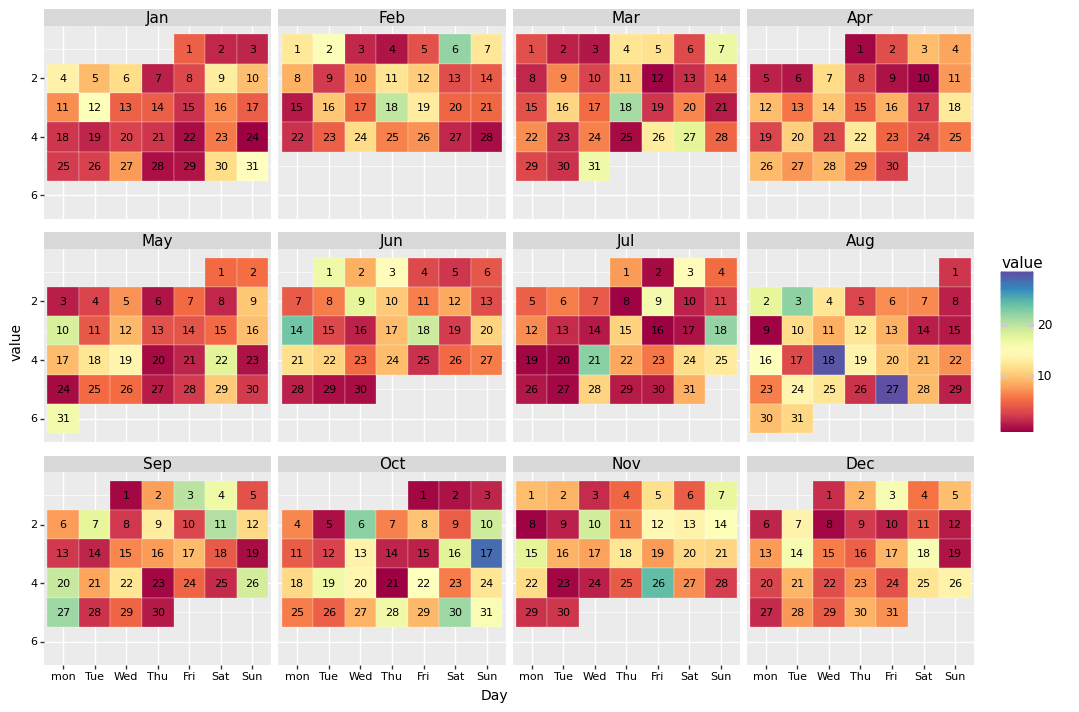

In [62]:
p1 = (
    ggplot(df, aes(x='Weekday_label', y='month_week', fill='value'))+
    geom_tile(colour='white', size=0.1)+  # 画出日历的方框
    scale_fill_cmap(cmap_name='Spectral')+
    geom_text(aes(label='Day'), size=8)+
    facet_wrap('~Month_label', nrow=3)+  # 按照月份分面
    scale_y_reverse()+  #将y周转向，因为越往下周数越大
    xlab('Day')+ylab('value')+
    theme(
        strip_text = element_text(size=11,face="plain",color="black"),
        axis_title =element_text(size=10,face="plain",color="black"),
        axis_text = element_text(size=8,face="plain",color="black"),
        legend_position = 'right',
        legend_background = element_blank(), 
        aspect_ratio=0.85, 
        figure_size=(12,12), 
        dpi=100)
)
print(p1)

### 5.5 空间分布图表

在介绍地图可视化之前，先来学习下关于地图数据的相关知识。绘制地理图表，首先得有空间位置数据，地图常见的数据格式有：SHP格式与Json格式。一般来说，在国家地理信息统计局提供的地图数据大多数以SHP格式，而大多数空间分析软件都能打开SHP格式的数据集并进行可视化；Json格式表示空间信息越来越常用，但是这种形式的数据体积更大。在Python中，我们可以使用GeoPandas包可以轻松读取这两种数据形式的地图数据。在geopandas中，有两种基本的数据格式：GeoSeries与GeoDataFrame两种基础数据结构，对应pandas的两种基本数据结构：Series和DataFrame。我们来用一个案例说明：

<div class="alert alert-warning" role="alert">
  注：需要安装geopandas，命令：pip install geopandas

</div>

In [66]:
import geopandas as gpd
world_data = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
world_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


从world_data数据来看，geopandas除了geometry这一列外，其余的都很正常，与普通的DataFrame的样子是一样的，现在我们侧重来看看geometry这一列是什么？geometry列是一个 shapely 对象， shapely 对象可以描述空间中的点线面，我们可以试试shapely是如何定义点线面的：

In [67]:
# shaply定义空间中的点：
from shapely import geometry
# shapely.geometry.Point(x, y)创建单个点对象
point_shapely = gpd.GeoSeries([geometry.Point(0, 0),
               geometry.Point(0, 1),
               geometry.Point(1, 1),
               geometry.Point(1, 0)],
              index=['A', 'B', 'C', 'D'])
point_shapely

A    POINT (0.00000 0.00000)
B    POINT (0.00000 1.00000)
C    POINT (1.00000 1.00000)
D    POINT (1.00000 0.00000)
dtype: geometry

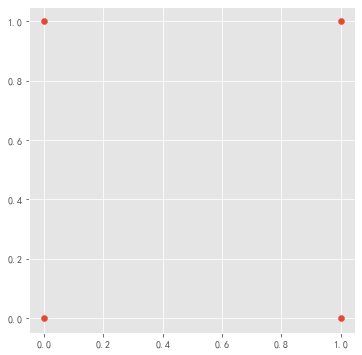

In [68]:
point_shapely.plot(figsize=(6,6))
plt.show()

In [69]:
# shapely.geometry.MultiPoint([(x1, y1), (x2, y2), ...])创建多点集合
mul_point_shapely = gpd.GeoSeries([geometry.MultiPoint([(0, 1), (1, 0)]),
               geometry.MultiPoint([(0, 0), (1, 1)])],
              index=['A', 'B'])
mul_point_shapely

A    MULTIPOINT (0.00000 1.00000, 1.00000 0.00000)
B    MULTIPOINT (0.00000 0.00000, 1.00000 1.00000)
dtype: geometry

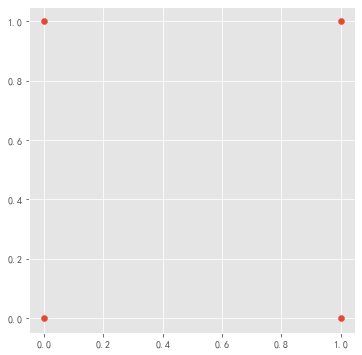

In [70]:
mul_point_shapely.plot(figsize=(6,6))
plt.show()

In [71]:
# shaply定义空间中的线：
# shapely.geometry.LineString([(x1, y1), (x2, y2), ...])创建多点按顺序连接而成的线段
lin_shapely = gpd.GeoSeries([geometry.LineString([(0, 0), (1, 1), (1, 0)]),
               geometry.LineString([(0, 0), (0, 1), (-1, 0)])],
              index=['A', 'B'])
lin_shapely

A    LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...
B    LINESTRING (0.00000 0.00000, 0.00000 1.00000, ...
dtype: geometry

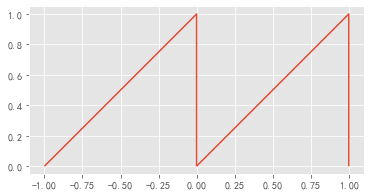

In [72]:
lin_shapely.plot(figsize=(6,6))
plt.show()

In [73]:
# shapely.geometry.MultiLineString([LineString1, LineString2])创建多条线段的集合
mul_lin_shapely = gpd.GeoSeries([geometry.MultiLineString([[(0, 0), (1, 1), (1, 0)],
                                        [(-1, 0), (0, 1), (1, 0)]])],
                                        index=['A'])
mul_lin_shapely


A    MULTILINESTRING ((0.00000 0.00000, 1.00000 1.0...
dtype: geometry

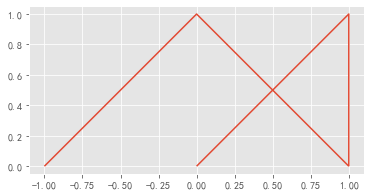

In [74]:
mul_lin_shapely.plot(figsize=(6,6))
plt.show()

In [75]:
# shaply定义空间中的面：
# shapely.geometry.Polygon([(x1, y1), (x2, y2),...])创建无孔面
polygon_shaply = gpd.GeoSeries([geometry.Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])],
              index=['A'])
polygon_shaply

A    POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....
dtype: geometry

<div class="alert alert-warning" role="alert">
  注：需要安装descartes，命令：pip install descartes

</div>


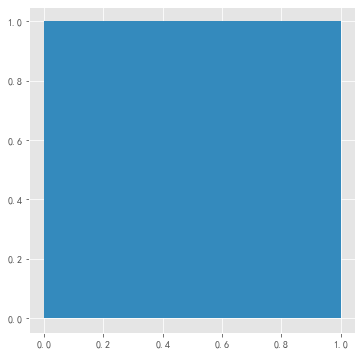

In [93]:
polygon_shaply.plot(figsize=(6,6))
plt.show()

In [94]:

# 这里shapely.geometry.Polygon(polygonExteriors, interiorCoords)创建有孔面
# 其中polygonExteriors用于定义整个有孔Polygon的外围，是一个无孔的多边形
# interiorCoords是用于定义内部每个孔洞（本质上是独立的多边形）的序列
polygon_shapely = gpd.GeoSeries([geometry.Polygon([(0,0),(10,0),(10,10),(0,10)],
                                [((1,2),(4,3),(5,1),(1,0)), ((9,9),(9,8),(8,8),(8,9))])]
                                )
polygon_shapely

0    POLYGON ((0.00000 0.00000, 10.00000 0.00000, 1...
dtype: geometry

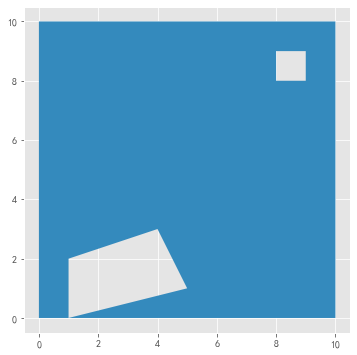

In [95]:
polygon_shapely.plot(figsize=(6,6))
plt.show()

In [96]:
# shapely.geometry.MultiPolygon([Polygon1, Polygon2])创建多个面的集合
mul_polygon_shapely = gpd.GeoSeries([geometry.MultiPolygon([geometry.Polygon([(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]),
                                      geometry.Polygon([(2, 2), (2, 3), (3, 3), (3, 2), (2, 2)])])],
                    index=['A'])
mul_polygon_shapely

A    MULTIPOLYGON (((0.00000 0.00000, 0.00000 1.000...
dtype: geometry

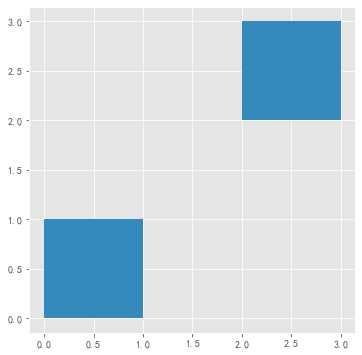

In [97]:
mul_polygon_shapely.plot(figsize=(6,6))
plt.show()

我们为什么这么大费周章定义那么多的shapely对象呢？原因其实很简单，就是计算每个对象的几何属性：面积、长度等等，而GeoSeries属性可以获取这些几何属性，如：

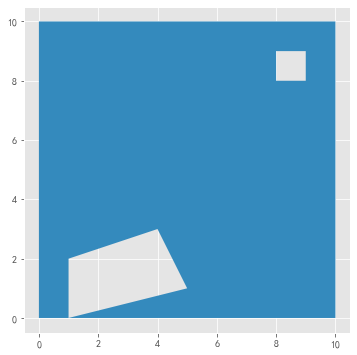

In [98]:
polygon_shapely = gpd.GeoSeries([geometry.Polygon([(0,0),(10,0),(10,10),(0,10)],
                                [((1,2),(4,3),(5,1),(1,0)), ((9,9),(9,8),(8,8),(8,9))])]
                                )
polygon_shapely.plot(figsize=(6,6))
plt.show()

In [99]:
# 获取有孔面的面积
polygon_shapely.area

0    91.5
dtype: float64

In [100]:
# 获取集合对象的边界
polygon_shapely.bounds

,minx,miny,maxx,maxy
0,0.0,0.0,10.0,10.0


In [101]:
# 获取集合对象的长度(边界+挖空边界长度)
polygon_shapely.length

0    55.521451
dtype: float64

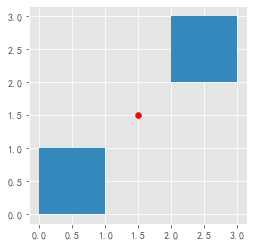

In [102]:
# 获取对象的重心
mul_polygon_shapely = gpd.GeoSeries([geometry.MultiPolygon([geometry.Polygon([(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]),
                                      geometry.Polygon([(2, 2), (2, 3), (3, 3), (3, 2), (2, 2)])])],
                    index=['A'])
ax = mul_polygon_shapely.plot()
mul_polygon_shapely.centroid.plot(ax=ax, color='red')
plt.show()

GeoDataFrame数据结构其实就是包含了正常的DataFrame还有一列Shapely对象（geometry）的特殊DataFrame对象，如：

In [103]:
world_data = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
world_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


那问题来了，Shapely对象（geometry）是如何将点和实际位置联系起来的，这个就类似于我们得到了一组点的坐标，但是我们需要将点放到具体的图中。解决这个问题的关键在于选择合适的坐标系，在空间分析中一般有两大类坐标系（坐标参考系统（CRS））：地理坐标系和投影坐标系。(参考文章：https://blog.csdn.net/fengdu78/article/details/104368158)

- 地理坐标系：以**弧度制**下度数为单位的地理坐标系（Geographic Coordinate Systems）帮助我们定位物体在地球球面上的具体位置以及绘制球体地图。（如图所示）
  
  ![jupyter](./images/4.png)

  地理坐标系以地表上确定的某一个点为原点 ，创建了包裹全球的网格，譬如WGS84，将本初子午线与赤道的交点作为原点，并形成经纬度。

  ![jupyter](./images/5.png)

  在地理坐标系中，我们能准确的定位一个地方的点位于哪里（经纬度），但是地理坐标系有一个致命的问题没有解决，就是度量问题。如果两个大小不同的球体，两个球体上两个经纬度不同的点之间的距离显然是不一样的，半径越大的球体，距离越长。为了解决度量问题，我们引入了投影坐标系！

- 投影坐标系：地理坐标系虽然解决了我们在地球球面上定位的问题，但纬度和经度位置没有使用统一的测量单位。在地理坐标系中，我们既不能直接在地理坐标系下精确度量几何对象的长度、面积，也无法直接用地理坐标系在平面上绘制出几何对象真实的形状。为了解决以上问题，人们发明了各种投影坐标系，**投影坐标系指的是从将3D球面展平为2D平面的一套数学计算方法，利用它可以优化形状、比例/距离以及面积的失真情况**。但实际情况中没有在整个地球表面都能“三全其美”的投影坐标系，有些投影坐标系优化形状上的失真，有些投影坐标系优化距离上的失真，有些投影坐标系专门针对面积失真进行优化，而有些投影坐标系可以对局部区域进行三个方面上的优化。

  ![jupyter](./images/6.png)

  在众多投影坐标系的方法中，用得较为广泛的有：墨卡托投影法，墨卡托投影法可以通俗地理解为用圆筒包裹地球球体，从球心发散出的光穿过球体上每个位置点投射到外部圆筒内壁从而完成3D向2D的变换。

  ![jupyter](./images/8.png)

  使用墨卡托投影法的后果是越靠近极点的几何对象被拉伸形变得越严重，这就是为什么俄罗斯的领土看起来这么大的原因了。
  

In [104]:
# 查看world_data的坐标参考系：(CRS是EPSG:4326, 该CRS使用纬度和经度作为坐标)
world_data.crs


{'init': 'epsg:4326'}

In [105]:
# 使用geopandas修改数据的CRS:(将地理坐标系转化为投影坐标系就能计算面积、长度等)
world_data = world_data.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")
world_data.crs

# "+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"是Proj4语法，不同的坐标系可以使用不同的proj4语法表示，如：
# +proj=utm +zone=11 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0表示：
# proj=utm：声明投影方法为墨卡托
# zone=11：声明对应北11区（因为这里是横轴墨卡托所以拥有独立分区，但并不是所有CRS都有分区，且在Proj4中区号加S才为南半球分区如11S，否则默认为北半球分区）
# datum=WGS84：声明基准面为WGS84(基准面是椭球体用来逼近某地区用的，因此各个国家都有各自的基准面。国内常用的基准面有：BEIJING1954，XIAN1980，WGS84等)
# units=m：声明坐标系单位设置为米
# ellps=WGS84：声明椭球面（如何计算地球的圆度）使用WGS84


RuntimeError: b'no arguments in initialization list'

In [106]:
# 有了面积，就可以计算人口密度：人口数 / 面积
world_data['population_density'] = world_data.pop_est / world_data.area * 10**6
world_data.sort_values(by='population_density', ascending=False)
# 孟加拉国的人口密度最大，南极洲的人口密度最小

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,population_density
99,157826578,Asia,Bangladesh,BGD,628400.00,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",1.331064e+13
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",9.458667e+12
140,23508428,Asia,Taiwan,TWN,1127000.00,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",7.724872e+12
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",6.332315e+12
169,11901484,Africa,Rwanda,RWA,21970.00,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",6.265918e+12
...,...,...,...,...,...,...,...
144,339747,Europe,Iceland,ISL,16150.00,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",1.651723e+10
20,2931,South America,Falkland Is.,FLK,281.80,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",1.376864e+09
23,140,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.00,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",9.770204e+07
22,57713,North America,Greenland,GRL,2173.00,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...",8.518404e+07


In [107]:
# 将人口密度的情况反映在地图上：
import matplotlib
norm = matplotlib.colors.LogNorm(vmin=world_data.population_density.min(), vmax=world_data.population_density.max())

world_data.to_crs('epsg:4326').plot("population_density", 
                                   figsize=(16,8), 
                                   legend=True,  
                                   norm=norm)
plt.show()

RuntimeError: b'no arguments in initialization list'

## 6.数据可视化案例：使用Plotnine绘制元素周期表

在初高中阶段，我们都学过元素周期表，那我们回忆下元素周期表长什么样子呢？

![jupyter](./images/9.jpeg)



In [108]:
# 读入元素周期表数据
element = pd.read_csv('./data/element.csv')
element

,atomic number,symbol,name,atomic mass,CPK,electronic configuration,electronegativity,atomic radius,ion radius,van der Waals radius,...,EA,standard state,bonding type,melting point,boiling point,density,metal,year discovered,group,period
0,1,H,Hydrogen,1.00794,#FFFFFF,1s1,2.20,37.0,NaN,120.0,...,-73.0,gas,diatomic,14.0,20.0,0.00009,nonmetal,1766,1,1
1,2,He,Helium,4.002602,#D9FFFF,1s2,NaN,32.0,NaN,140.0,...,0.0,gas,atomic,NaN,4.0,0.00000,noble gas,1868,18,1
2,3,Li,Lithium,6.941,#CC80FF,[He] 2s1,0.98,134.0,76 (+1),182.0,...,-60.0,solid,metallic,454.0,1615.0,0.54000,alkali metal,1817,1,2
3,4,Be,Beryllium,9.012182,#C2FF00,[He] 2s2,1.57,90.0,45 (+2),NaN,...,0.0,solid,metallic,1560.0,2743.0,1.85000,alkaline earth metal,1798,2,2
4,5,B,Boron,10.811,#FFB5B5,[He] 2s2 2p1,2.04,82.0,27 (+3),NaN,...,-27.0,solid,covalent network,2348.0,4273.0,2.46000,metalloid,1807,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Fl,Flerovium,[289],#FF1493,[Rn].5f14.6d10.7s2.7p2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,metal,1998,14,7
114,115,Uup,Ununpentium,[288],#FF1493,[Rn].5f14.6d10.7s2.7p3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,metal,2003,15,7
115,116,Lv,Livermorium,[293],#FF1493,[Rn].5f14.6d10.7s2.7p4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,metal,2000,16,7
116,117,Uus,Ununseptium,[294],#FF1493,[Rn].5f14.6d10.7s2.7p5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,halogen,2010,17,7


group特征就是该元素所在的族，发现group有的值中用 '-' 标记，说明它不属于任何族，它们应该是镧系或者锕系元素，'-' 符号最好用﹣1表示。

In [109]:
element.loc[element['group'] == '-', 'group'] = -1
element['group'] = element['group'].astype('int')
element['group'].unique()

array([ 1, 18,  2, 13, 14, 15, 16, 17,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, -1])

In [110]:
# 转化分类数据：bonding type键合类型， metal金属
element['bonding type'] = element['bonding type'].astype('category')
element['metal'] = element['metal'].astype('category')

In [111]:
# 将原子数atomic number变成字符串
element['atomic_number'] = element['atomic number'].astype(str)

一般来说，元素周期表有两个部分，top和bottom。top部分主要绘制的是能找到group 不等于 -1的元素，而bottom部分主要绘制的是group等于-1的元素。因此：

In [112]:
## 分别用top和bottom变量引用上下部分元素集合
top = element.loc[element['group'] != -1, :]
bottom = element.loc[element['group'] == -1, :]

In [113]:
# 元素周期表中横向表示的是族（group），纵向表示的是周期（period）
top['x'] = top['group'].copy()
top['y'] = top['period'].copy()


<ipython-input-113-46db247c7a37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-113-46db247c7a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


除了top的部分之外，bottom的锕系和镧系元素也是类似的，但是横坐标不能用 group ，因为bottom的group为﹣1。因此：

In [114]:
# hs 和 vs 分别表示横、纵间距，这样可以为锕系和镧系元素设置横纵坐标值。
nrows = 2
hs = 3.5
vs = 3
bottom['x'] = np.tile(np.arange(len(bottom) // nrows), nrows) + hs
bottom['y'] = bottom.period + vs

<ipython-input-114-1a6bb3cb666e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-114-1a6bb3cb666e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


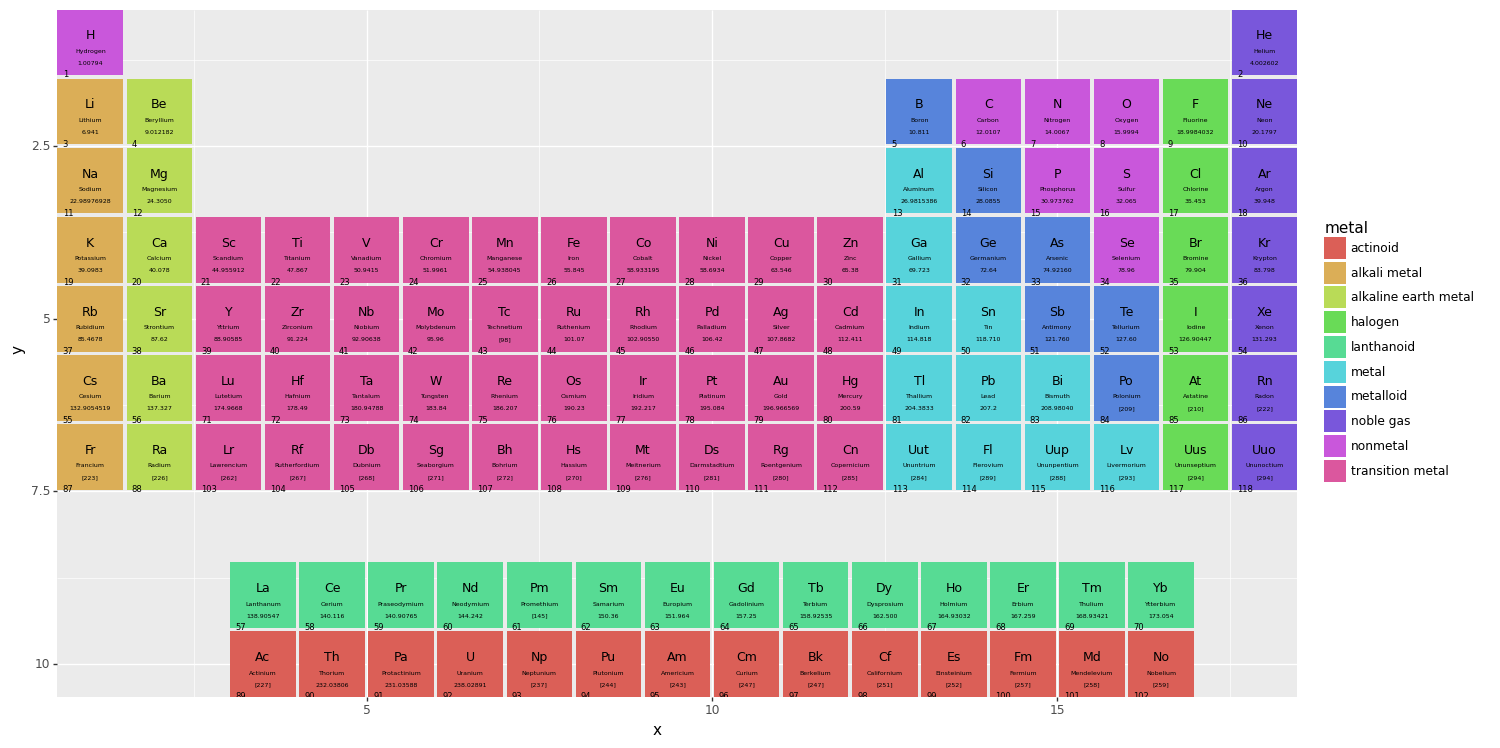

In [115]:
# 开始绘制元素周期表：
p1 = (ggplot(aes('x', 'y'))+ 
    geom_tile(top, aes(width=0.95, height=0.95))+
    geom_tile(bottom, aes(width=0.95, height=0.95))+
    scale_y_reverse()+
    aes(fill='metal')+  # 将tile颜色填充
    geom_text(top, aes(label='atomic_number'),nudge_x=-0.40, nudge_y=-.40,ha='left', va='top', fontweight='normal', size=6)+   # 添加top的atomic_number（原子序数）注释
    geom_text(top, aes(label='symbol'),nudge_y=.1, size=9)+      #  添加top的symbol（元素符号）注释
    geom_text(top, aes(label='name'),nudge_y=-0.125, fontweight='normal', size=4.5)+   #  添加top的name（元素名称）注释
    geom_text(top, aes(label='atomic mass'),nudge_y=-.3, fontweight='normal', size=4.5)+   # 添加top的atomic mass（原子数）注释
    geom_text(bottom, aes(label='atomic_number'),nudge_x=-0.40, nudge_y=-.40,ha='left', va='top', fontweight='normal', size=6)+
    geom_text(bottom, aes(label='symbol'),nudge_y=.1, size=9)+
    geom_text(bottom, aes(label='name'),nudge_y=-0.125, fontweight='normal', size=4.5)+
    geom_text(bottom, aes(label='atomic mass'),nudge_y=-.3, fontweight='normal', size=4.5)+
    coord_equal(expand=False)+ # 设置坐标轴， expand=False, 代表坐标系的大小由数据决定
    theme(figure_size=(16,8))    
)
print(p1)

结语：数据可视化不仅仅是一个可视化过程，更重要的是一门艺术。数据可视化的难点在于如何将数据转化成每个图表需要的数据形式，不同的绘制工具需要的格式也是不一样的。数据可视化想要做的精美，需要花时间去考虑各种美化的配色、坐标设置等等。数据可视化的核心在于表达数据，要知道如何使用不同的图表表达不同的数据，言简意赅，生动形象。